# Introduction

In [562]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import statsmodels.api as sm

In [563]:
df_0 = pd.read_excel("/Users/arnaudcruchaudet/Desktop/Expedia Group – Video Interview – R-93436 Data Scientist I - Pricing Analytics/Pricing Analytics - Case Study Data[3][7].xlsx")

In [564]:
df_1 = pd.read_excel("/Users/arnaudcruchaudet/Desktop/Expedia Group – Video Interview – R-93436 Data Scientist I - Pricing Analytics/Pricing Analytics - Case Study Data[3][7].xlsx")

# Data Set Correction

In [565]:
# Identifying the affected APAC data from 11/02/2024 onward
affected_apac = df_1.query("`HotelSuperRegion` == 'APAC' & `Device` == 'Mobile' & `date` >= '2024-11-02'")

In [566]:
# Checking if values are approximately 100 times larger than expected
affected_apac.loc[:, ['NBV A', 'NBV B']] = affected_apac.loc[:, ['NBV A', 'NBV B']] / 100

/var/folders/dp/dtjy860d4jz18nc86phz4n7m0000gn/T/ipykernel_8948/4142973112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  affected_apac.loc[:, ['NBV A', 'NBV B']] = affected_apac.loc[:, ['NBV A', 'NBV B']] / 100
/var/folders/dp/dtjy860d4jz18nc86phz4n7m0000gn/T/ipykernel_8948/4142973112.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  affected_apac.loc[:, ['NBV A', 'NBV B']] = affected_apac.loc[:, ['NBV A', 'NBV B']] / 100


In [567]:
# Updating the main dataset with corrected values
df_1.update(affected_apac)

In [568]:
checking_table = pd.DataFrame({
    "NBV_A" : df_0["NBV A"].describe().round(),
    "NBV__A_corrected" : df_1["NBV A"].describe().round(), 
    "NBV_B" : df_0["NBV B"].describe().round(),
    "NBV__B_corrected" : df_1["NBV B"].describe().round()
})
checking_table

,NBV_A,NBV__A_corrected,NBV_B,NBV__B_corrected
count,2208.0,2208.0,2208.0,2208.0
mean,746937.0,158524.0,2094392.0,398714.0
std,2028224.0,105027.0,5862645.0,247038.0
min,19133.0,19133.0,55518.0,55518.0
25%,101594.0,93964.0,259766.0,256610.0
50%,142574.0,123515.0,365739.0,315550.0
75%,313055.0,199344.0,756706.0,491274.0
max,9345100.0,385288.0,26148600.0,895423.0


# 1. Univariate Analysis

## 1.1. Discret Variables

### 1.1.1. HotelSuperRegion

In [569]:
df_1["HotelSuperRegion"].value_counts()

NORAM    552
APAC     552
EMEA     552
LATAM    552
Name: HotelSuperRegion, dtype: int64

### 1.1.2. Device

In [570]:
df_1["Device"].value_counts()

Desktop    1104
Mobile     1104
Name: Device, dtype: int64

### 1.1.3. StarRating

In [571]:
df_1["StarRating"].value_counts()

High    736
Mid     736
Low     736
Name: StarRating, dtype: int64

## 1.2. Continuous Variables

### 1.2.1. spend

In [572]:
df_1["spend"].describe()

count     2208.000000
mean     10490.623188
std       2918.857616
min       3058.000000
25%       8218.750000
50%      11114.500000
75%      12500.750000
max      16522.000000
Name: spend, dtype: float64

<Axes: xlabel='spend'>

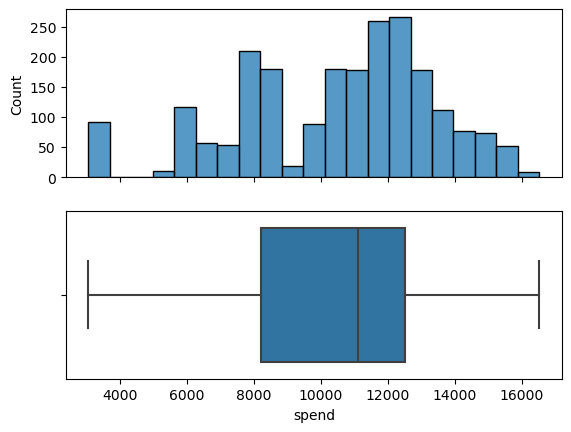

In [573]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(data=df_1, x="spend", ax = ax[0])
sns.boxplot(data=df_1, x="spend", ax = ax[1])

### 1.2.2. NBV A

In [574]:
df_1["NBV A"].describe().round()

count      2208.0
mean     158524.0
std      105027.0
min       19133.0
25%       93964.0
50%      123515.0
75%      199344.0
max      385288.0
Name: NBV A, dtype: float64

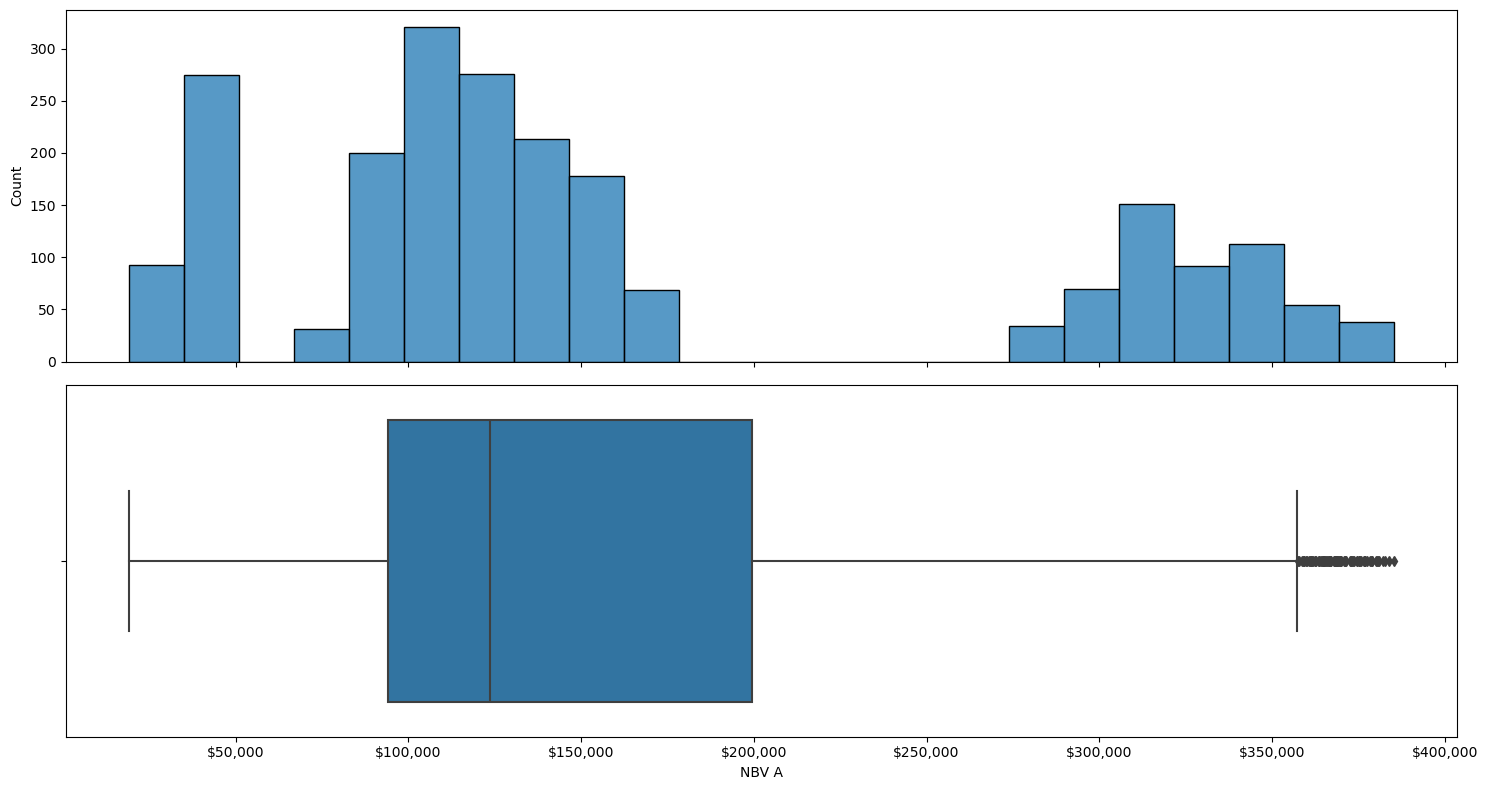

In [575]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(15,8))

sns.histplot(data=df_1, x="NBV A", ax=ax[0])
sns.boxplot(data=df_1, x="NBV A", ax=ax[1])

dollar_formatter = mtick.StrMethodFormatter('${x:,.0f}')

ax[0].xaxis.set_major_formatter(dollar_formatter)
ax[1].xaxis.set_major_formatter(dollar_formatter)

plt.tight_layout()
plt.show()

### 1.2.3. NBV B

In [576]:
df_1["NBV B"].describe().round()

count      2208.0
mean     398714.0
std      247038.0
min       55518.0
25%      256610.0
50%      315550.0
75%      491274.0
max      895423.0
Name: NBV B, dtype: float64

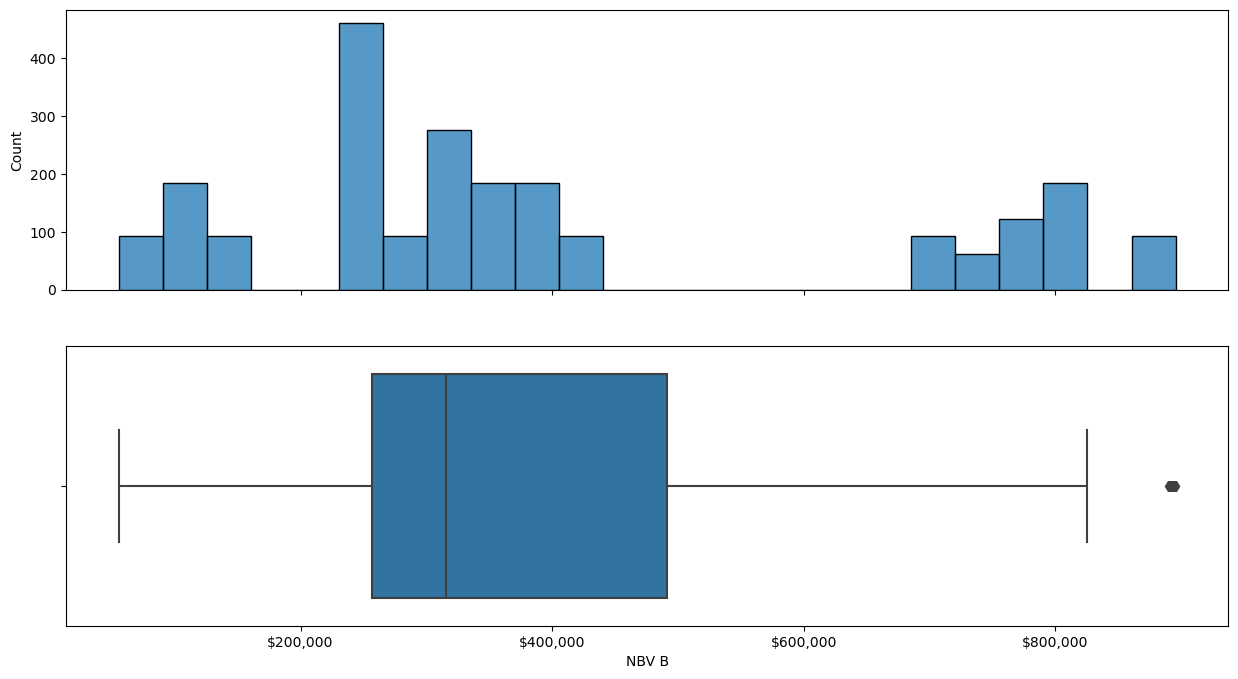

In [577]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(15,8))
sns.histplot(data=df_1, x="NBV B", ax = ax[0])
sns.boxplot(data=df_1, x="NBV B", ax = ax[1])

dollar_formatter = mtick.StrMethodFormatter('${x:,.0f}')

ax[0].xaxis.set_major_formatter(dollar_formatter)
ax[1].xaxis.set_major_formatter(dollar_formatter)


# 2. Multivariate Analysis

## 2.1. Discret Variables

### 2.1.1. HotelSuperRegion - Device

In [578]:
pd.crosstab(df_1["HotelSuperRegion"], df_1["Device"])

Device,Desktop,Mobile
HotelSuperRegion,,
APAC,276,276
EMEA,276,276
LATAM,276,276
NORAM,276,276


### 2.1.2. HotelSuperRegion - StarRating

In [579]:
pd.crosstab(df_1["HotelSuperRegion"], df_1["StarRating"])

StarRating,High,Low,Mid
HotelSuperRegion,,,
APAC,184,184,184
EMEA,184,184,184
LATAM,184,184,184
NORAM,184,184,184


### 2.1.3. StarRating - Device

In [580]:
pd.crosstab(df_1["Device"], df_1["StarRating"])

StarRating,High,Low,Mid
Device,,,
Desktop,368,368,368
Mobile,368,368,368


## 2.2. Contiuous Variables

No need to do spend - NBV A because NBV A is holdout group

### 2.2.1. spend - NBV B

#### 2.2.1.1. spend - NBV B Alone

<Axes: xlabel='spend', ylabel='NBV B'>

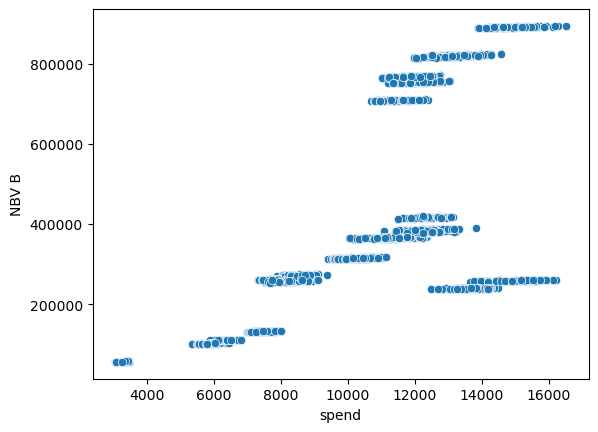

In [581]:
sns.scatterplot(x=df_1["spend"], y=df_1["NBV B"])

#### 2.2.1.2. spend - NBV B with HotelSuperRegion

<Axes: xlabel='spend', ylabel='NBV B'>

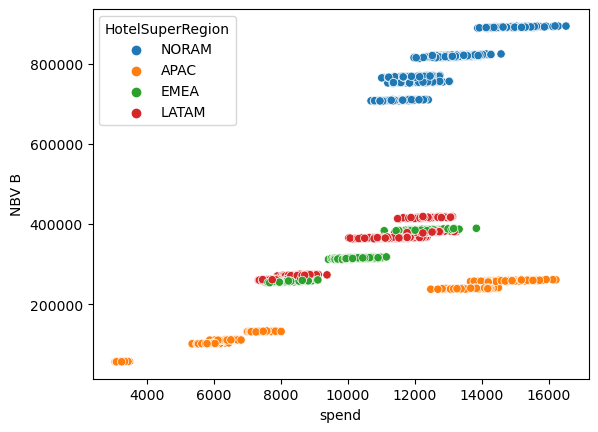

In [582]:
sns.scatterplot(x=df_1["spend"], y=df_1["NBV B"], hue=df_1['HotelSuperRegion'])

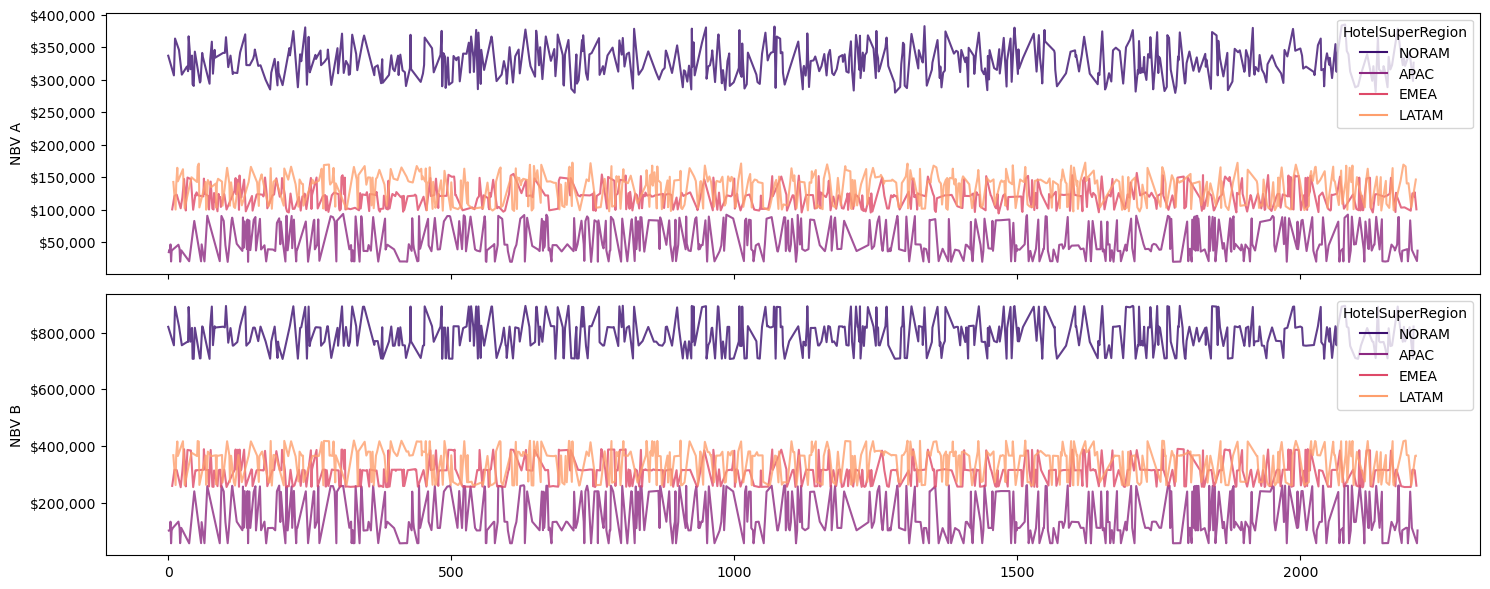

In [583]:
# Create subplots
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15, 6))

# Line plots
sns.lineplot(x=df_1.index, y=df_1["NBV A"], hue=df_1['HotelSuperRegion'], palette="magma", alpha=0.8, ax=axes[0])
sns.lineplot(x=df_1.index, y=df_1["NBV B"], hue=df_1['HotelSuperRegion'], palette="magma", alpha=0.8, ax=axes[1])

# Dollar formatter for Y-axis
dollar_formatter = mtick.StrMethodFormatter('${x:,.0f}')
axes[0].yaxis.set_major_formatter(dollar_formatter)
axes[1].yaxis.set_major_formatter(dollar_formatter)

# Improve layout
plt.tight_layout()
plt.show()


#### 2.2.1.3. spend - NBV B with Device

<Axes: xlabel='spend', ylabel='NBV B'>

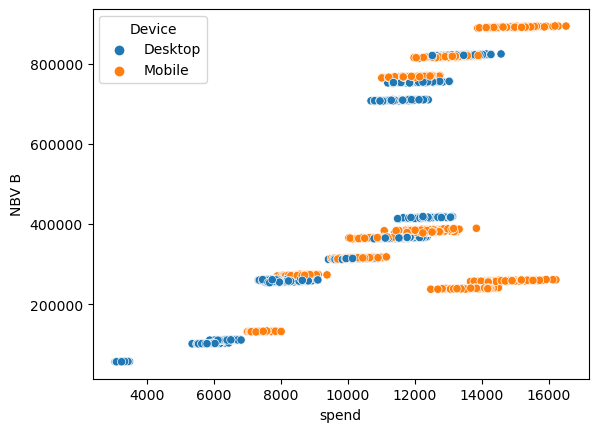

In [584]:
sns.scatterplot(x=df_1["spend"], y=df_1["NBV B"], hue=df_1['Device'])

#### 2.2.1.4. spend - NBV B with StarRatings

<Axes: xlabel='spend', ylabel='NBV B'>

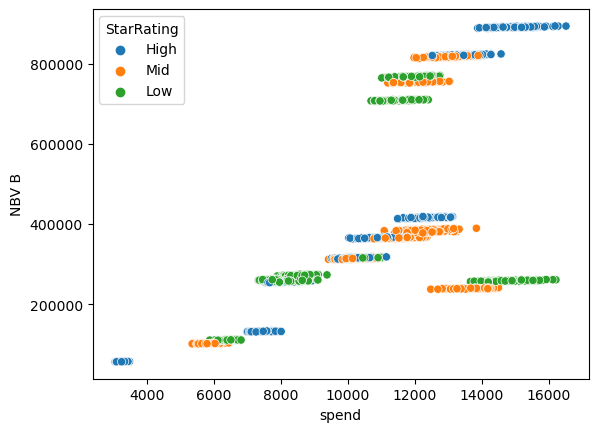

In [585]:
sns.scatterplot(x=df_1["spend"], y=df_1["NBV B"], hue=df_1['StarRating'])

### 2.2.2. NBV A - NBV B

#### 2.2.2.1. NBV A - NBV B Alone

<Axes: xlabel='NBV A', ylabel='NBV B'>

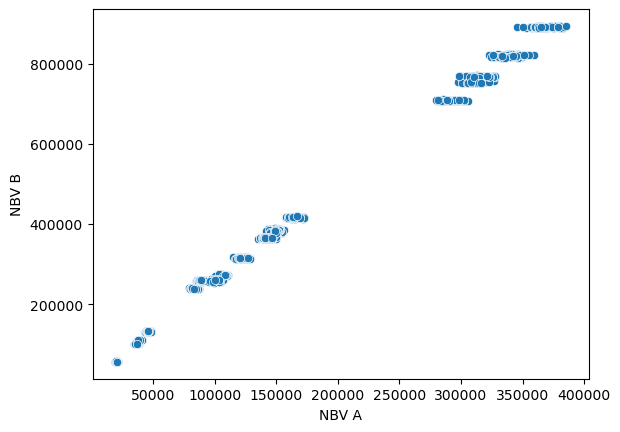

In [586]:
sns.scatterplot(x=df_1["NBV A"], y=df_1["NBV B"])

Linear relationship?

#### 2.2.2.2. NBV A - NBV B with HotelSuperRegion

<Axes: xlabel='NBV A', ylabel='NBV B'>

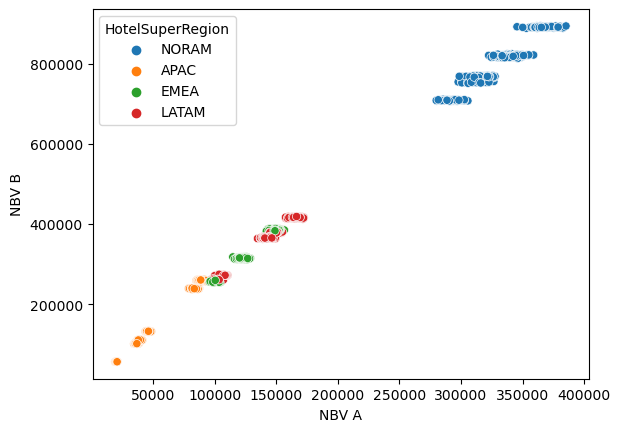

In [587]:
sns.scatterplot(x=df_1["NBV A"], y=df_1["NBV B"], hue=df_1['HotelSuperRegion'])

#### 2.2.2.3. NBV A - NBV B with Device

<Axes: xlabel='NBV A', ylabel='NBV B'>

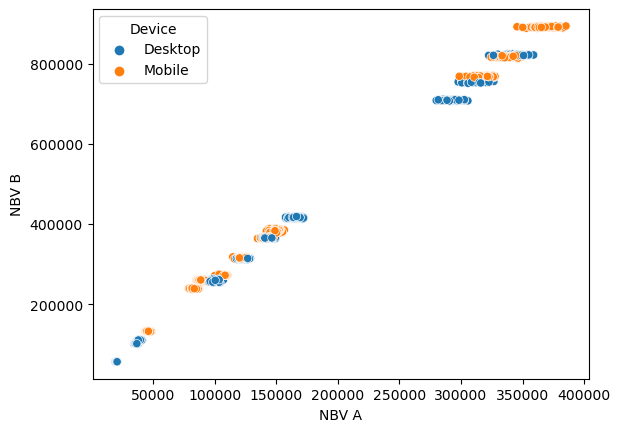

In [588]:
sns.scatterplot(x=df_1["NBV A"], y=df_1["NBV B"], hue=df_1['Device'])

#### 2.2.2.4. NBV A - NBV B with StarRatings

<Axes: xlabel='NBV A', ylabel='NBV B'>

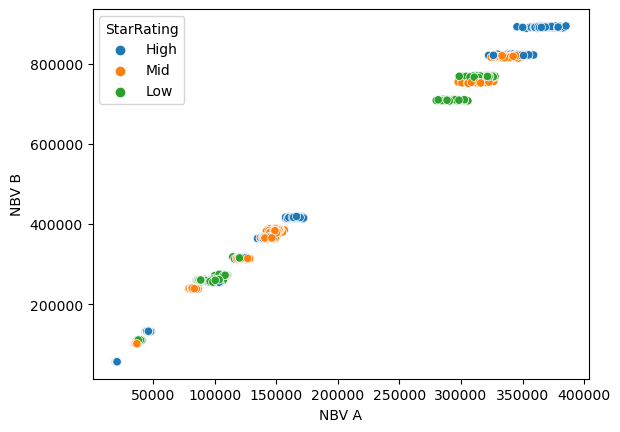

In [589]:
sns.scatterplot(x=df_1["NBV A"], y=df_1["NBV B"], hue=df_1['StarRating'])

## 2.3. Discret + Contiuous Variables

### 2.3.1. HotelSuperRegion - spend

In [590]:
df_1.groupby("HotelSuperRegion")['spend'].describe()

,count,mean,std,min,25%,50%,75%,max
HotelSuperRegion,,,,,,,,
APAC,552.0,8598.050725,4238.057739,3058.0,5930.75,6909.5,13623.75,16221.0
EMEA,552.0,9966.414855,1484.968745,7535.0,8487.50,10132.0,10684.00,13846.0
LATAM,552.0,10593.250000,1771.989624,7340.0,8528.75,11257.5,12087.50,13252.0
NORAM,552.0,12804.777174,1256.936641,10701.0,11862.75,12519.5,13523.50,16522.0


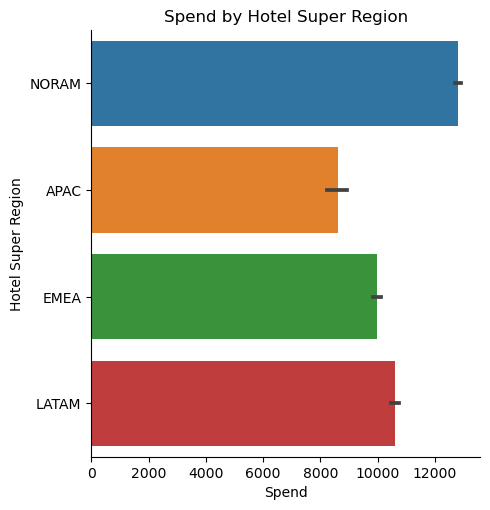

In [591]:
sns.catplot(data=df_1, x="spend", y="HotelSuperRegion", kind="bar")
plt.xlabel("Spend")
plt.ylabel("Hotel Super Region")
plt.title("Spend by Hotel Super Region")
plt.show()

### 2.3.2. HotelSuperRegion - NBV A

In [592]:
df_1.groupby("HotelSuperRegion")['NBV A'].describe().round()

,count,mean,std,min,25%,50%,75%,max
HotelSuperRegion,,,,,,,,
APAC,552.0,52412.0,25238.0,19133.0,36416.0,42536.0,83606.0,93451.0
EMEA,552.0,119525.0,16720.0,94135.0,101753.0,121378.0,124806.0,156603.0
LATAM,552.0,134379.0,23195.0,97260.0,105868.0,142749.0,149404.0,172485.0
NORAM,552.0,327779.0,25321.0,279919.0,310084.0,326630.0,343700.0,385288.0


<Figure size 1500x800 with 0 Axes>

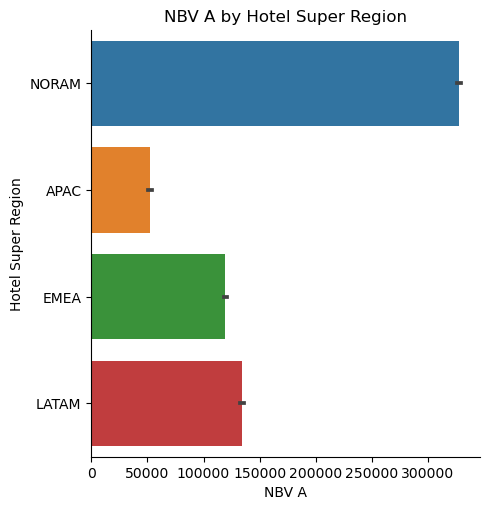

In [593]:
plt.figure(figsize=(15,8))
sns.catplot(data=df_1, x="NBV A", y="HotelSuperRegion", kind="bar")
plt.xlabel("NBV A")
plt.ylabel("Hotel Super Region")
plt.title("NBV A by Hotel Super Region")
plt.show()

### 2.3.3. HotelSuperRegion - NBV B

In [594]:
df_1.groupby("HotelSuperRegion")['NBV B'].describe().round()

,count,mean,std,min,25%,50%,75%,max
HotelSuperRegion,,,,,,,,
APAC,552.0,149560.0,73972.0,55518.0,101680.0,120965.0,239086.0,261486.0
EMEA,552.0,307377.0,43709.0,253649.0,257944.0,314350.0,316280.0,389595.0
LATAM,552.0,343571.0,56968.0,259183.0,272091.0,365798.0,379683.0,419233.0
NORAM,552.0,794348.0,58405.0,707396.0,754895.0,792924.0,822252.0,895423.0


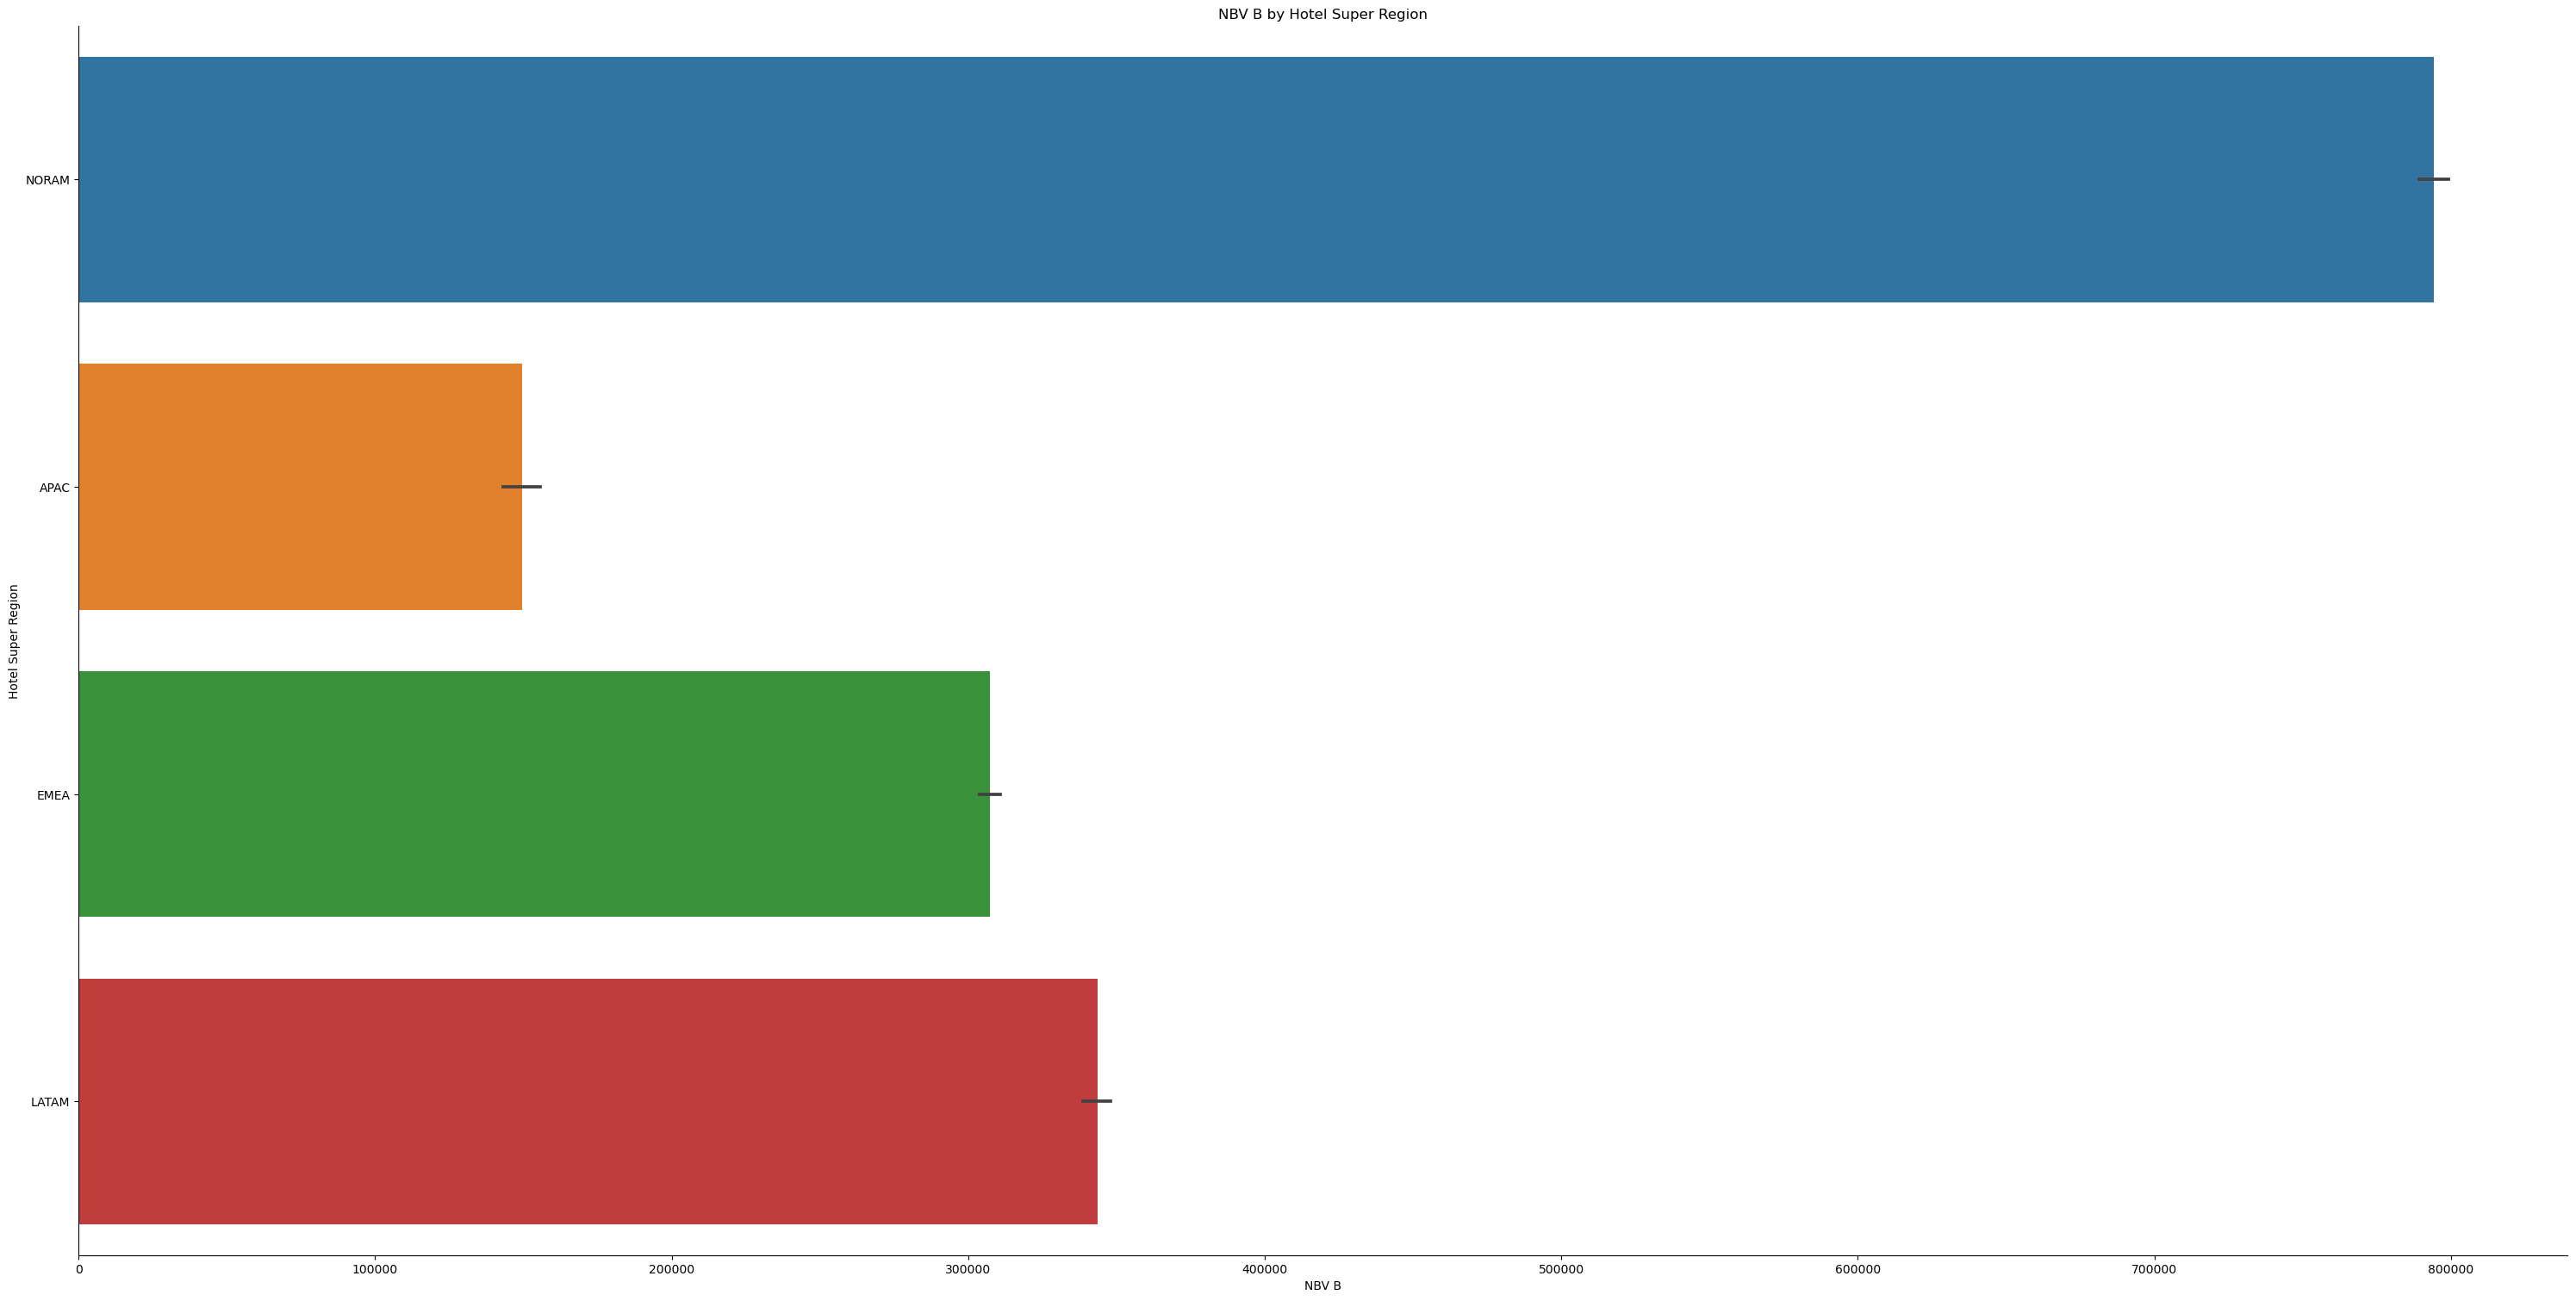

In [595]:
sns.catplot(
    data=df_1, 
    x="NBV B", 
    y="HotelSuperRegion", 
    kind="bar",
    height=15,         # height in inches
    aspect=2   # aspect ratio (width/height)
)

plt.xlabel("NBV B")
plt.ylabel("Hotel Super Region")
plt.title("NBV B by Hotel Super Region")
plt.show()


### 2.3.4. Device - spend

In [596]:
df_1.groupby("Device")['spend'].describe().round()

,count,mean,std,min,25%,50%,75%,max
Device,,,,,,,,
Desktop,1104.0,9251.0,2982.0,3058.0,7210.0,9272.0,11887.0,14583.0
Mobile,1104.0,11730.0,2254.0,6999.0,10320.0,11947.0,13311.0,16522.0


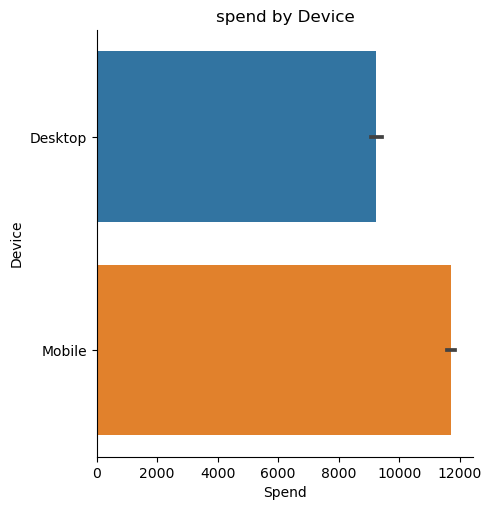

In [597]:
sns.catplot(data=df_1, x="spend", y="Device", kind="bar")
plt.xlabel("Spend")
plt.ylabel("Device")
plt.title("spend by Device")
plt.show()

### 2.3.5. Device - NBV A

In [598]:
df_1.groupby("Device")['NBV A'].describe().round()

,count,mean,std,min,25%,50%,75%,max
Device,,,,,,,,
Desktop,1104.0,147844.0,105489.0,19133.0,80936.0,111304.0,199344.0,359015.0
Mobile,1104.0,169204.0,103515.0,43734.0,98315.0,131217.0,192107.0,385288.0


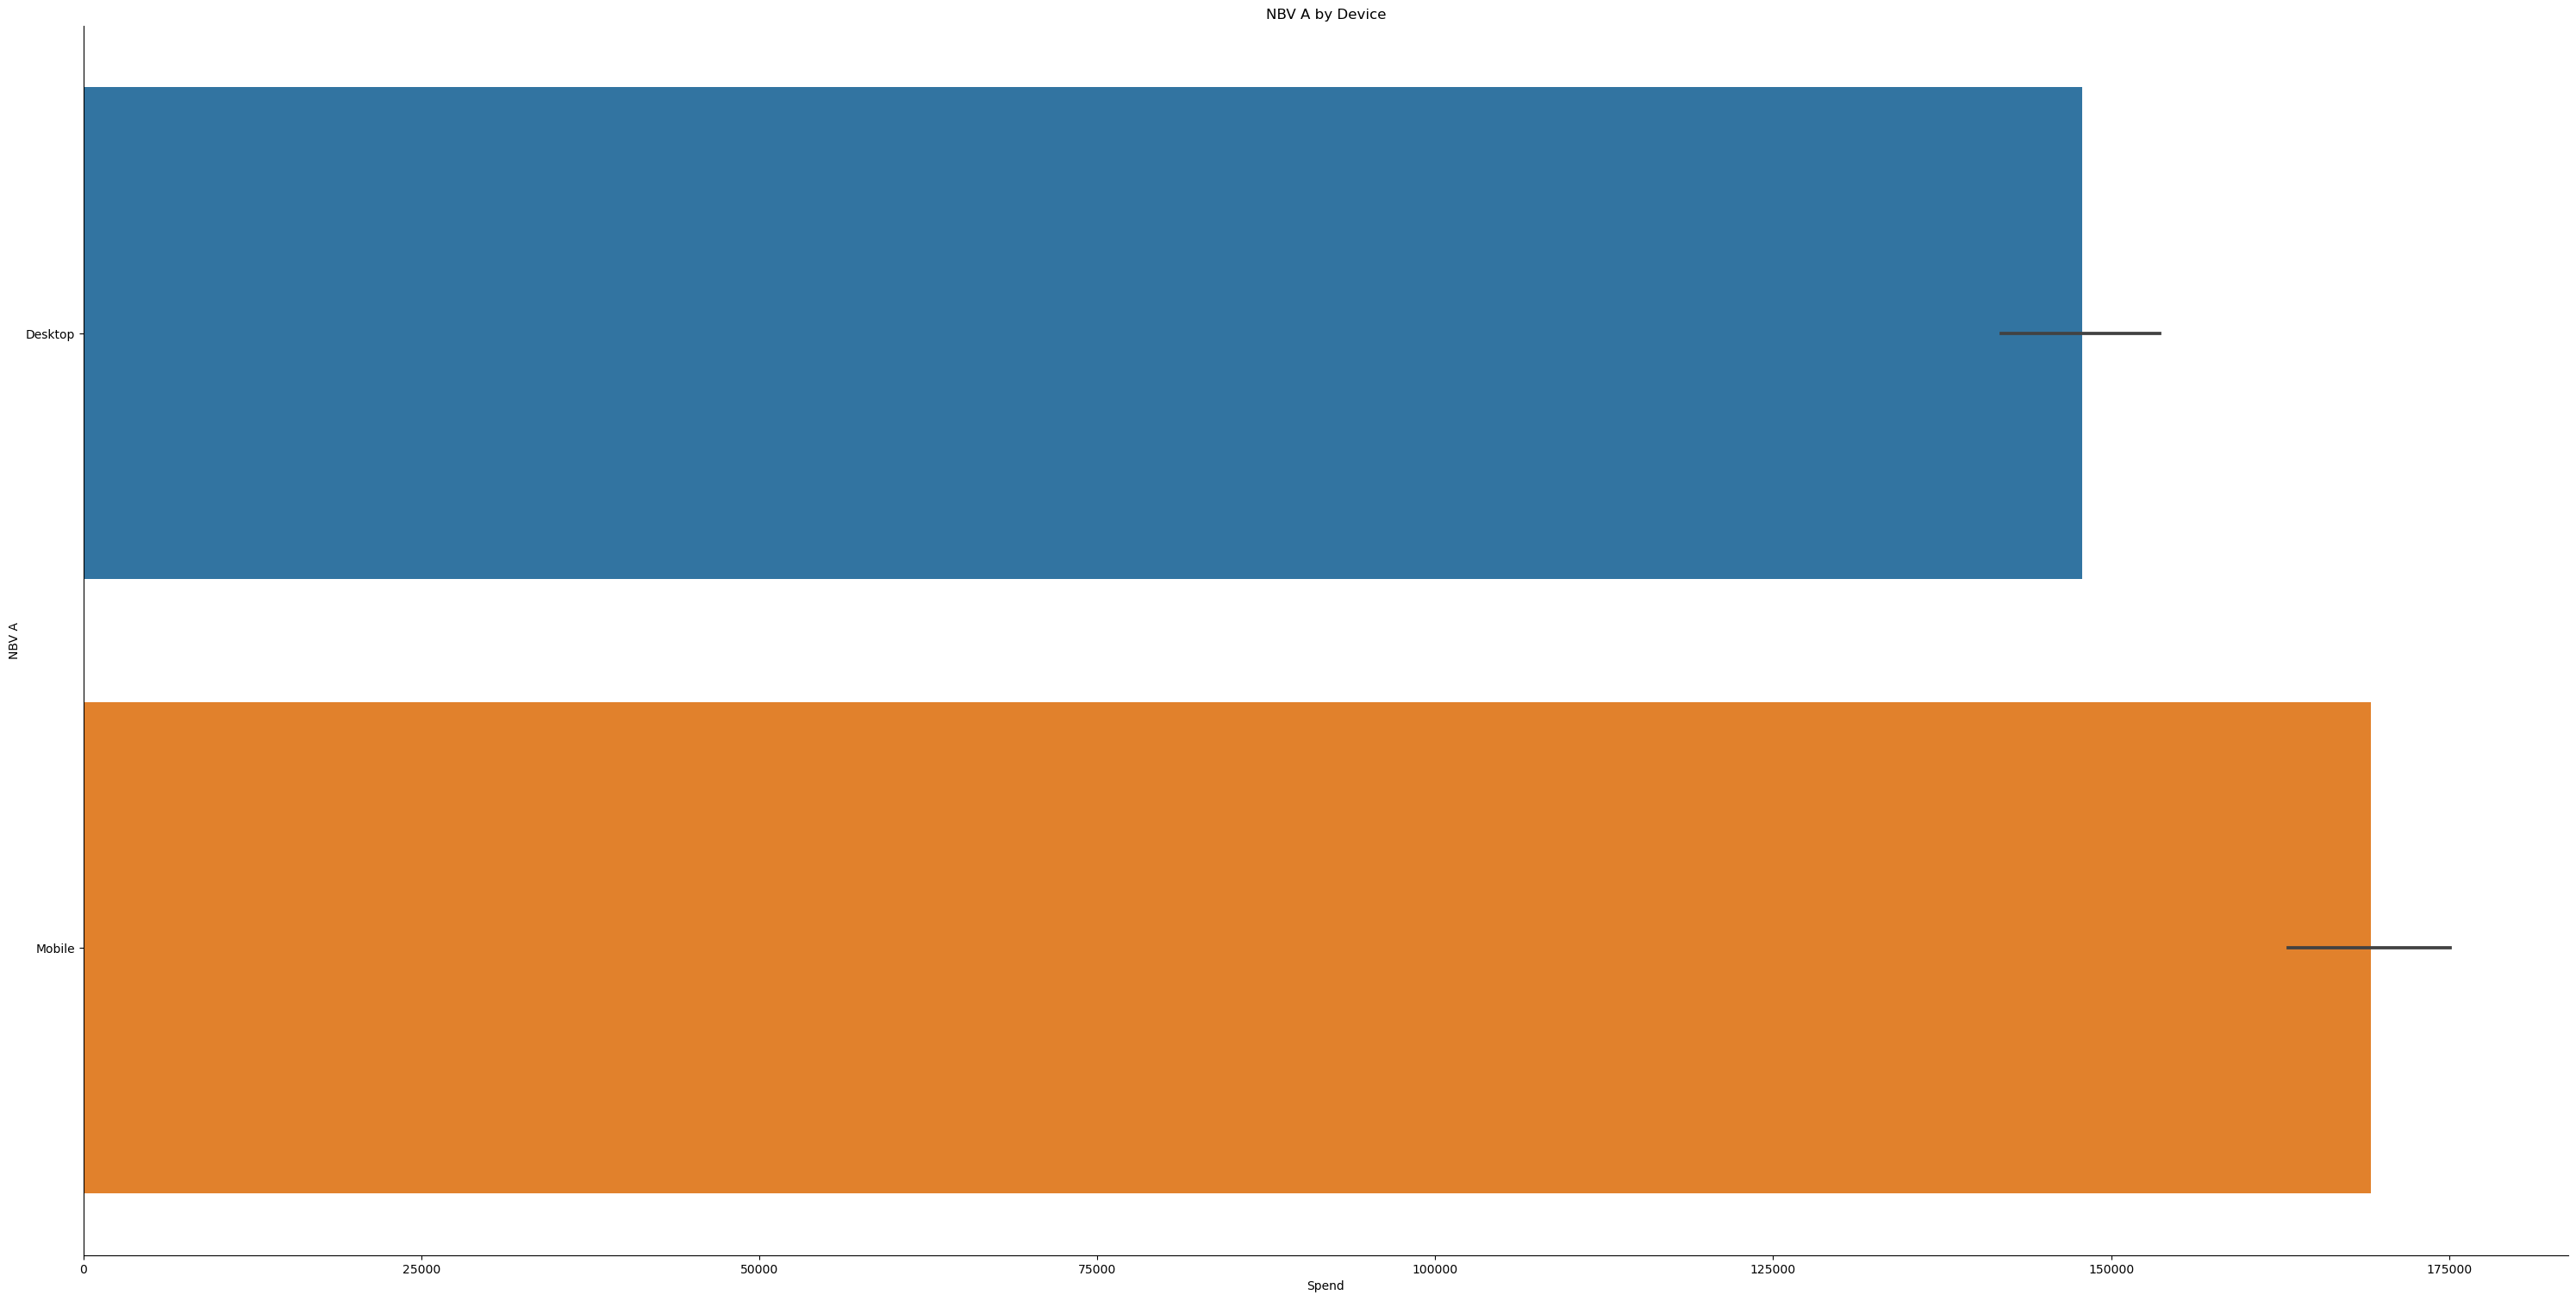

In [599]:
sns.catplot(data=df_1, x="NBV A", y="Device", kind="bar", height=15, aspect=2)
plt.xlabel("Spend")
plt.ylabel("NBV A")
plt.title("NBV A by Device")
plt.show()

### 2.3.6. Device - NBV B

In [600]:
df_1.groupby("Device")['NBV B'].describe().round()

,count,mean,std,min,25%,50%,75%,max
Device,,,,,,,,
Desktop,1104.0,368824.0,249886.0,55518.0,218090.0,287648.0,491274.0,825390.0
Mobile,1104.0,428604.0,240581.0,130515.0,267865.0,340535.0,483420.0,895423.0


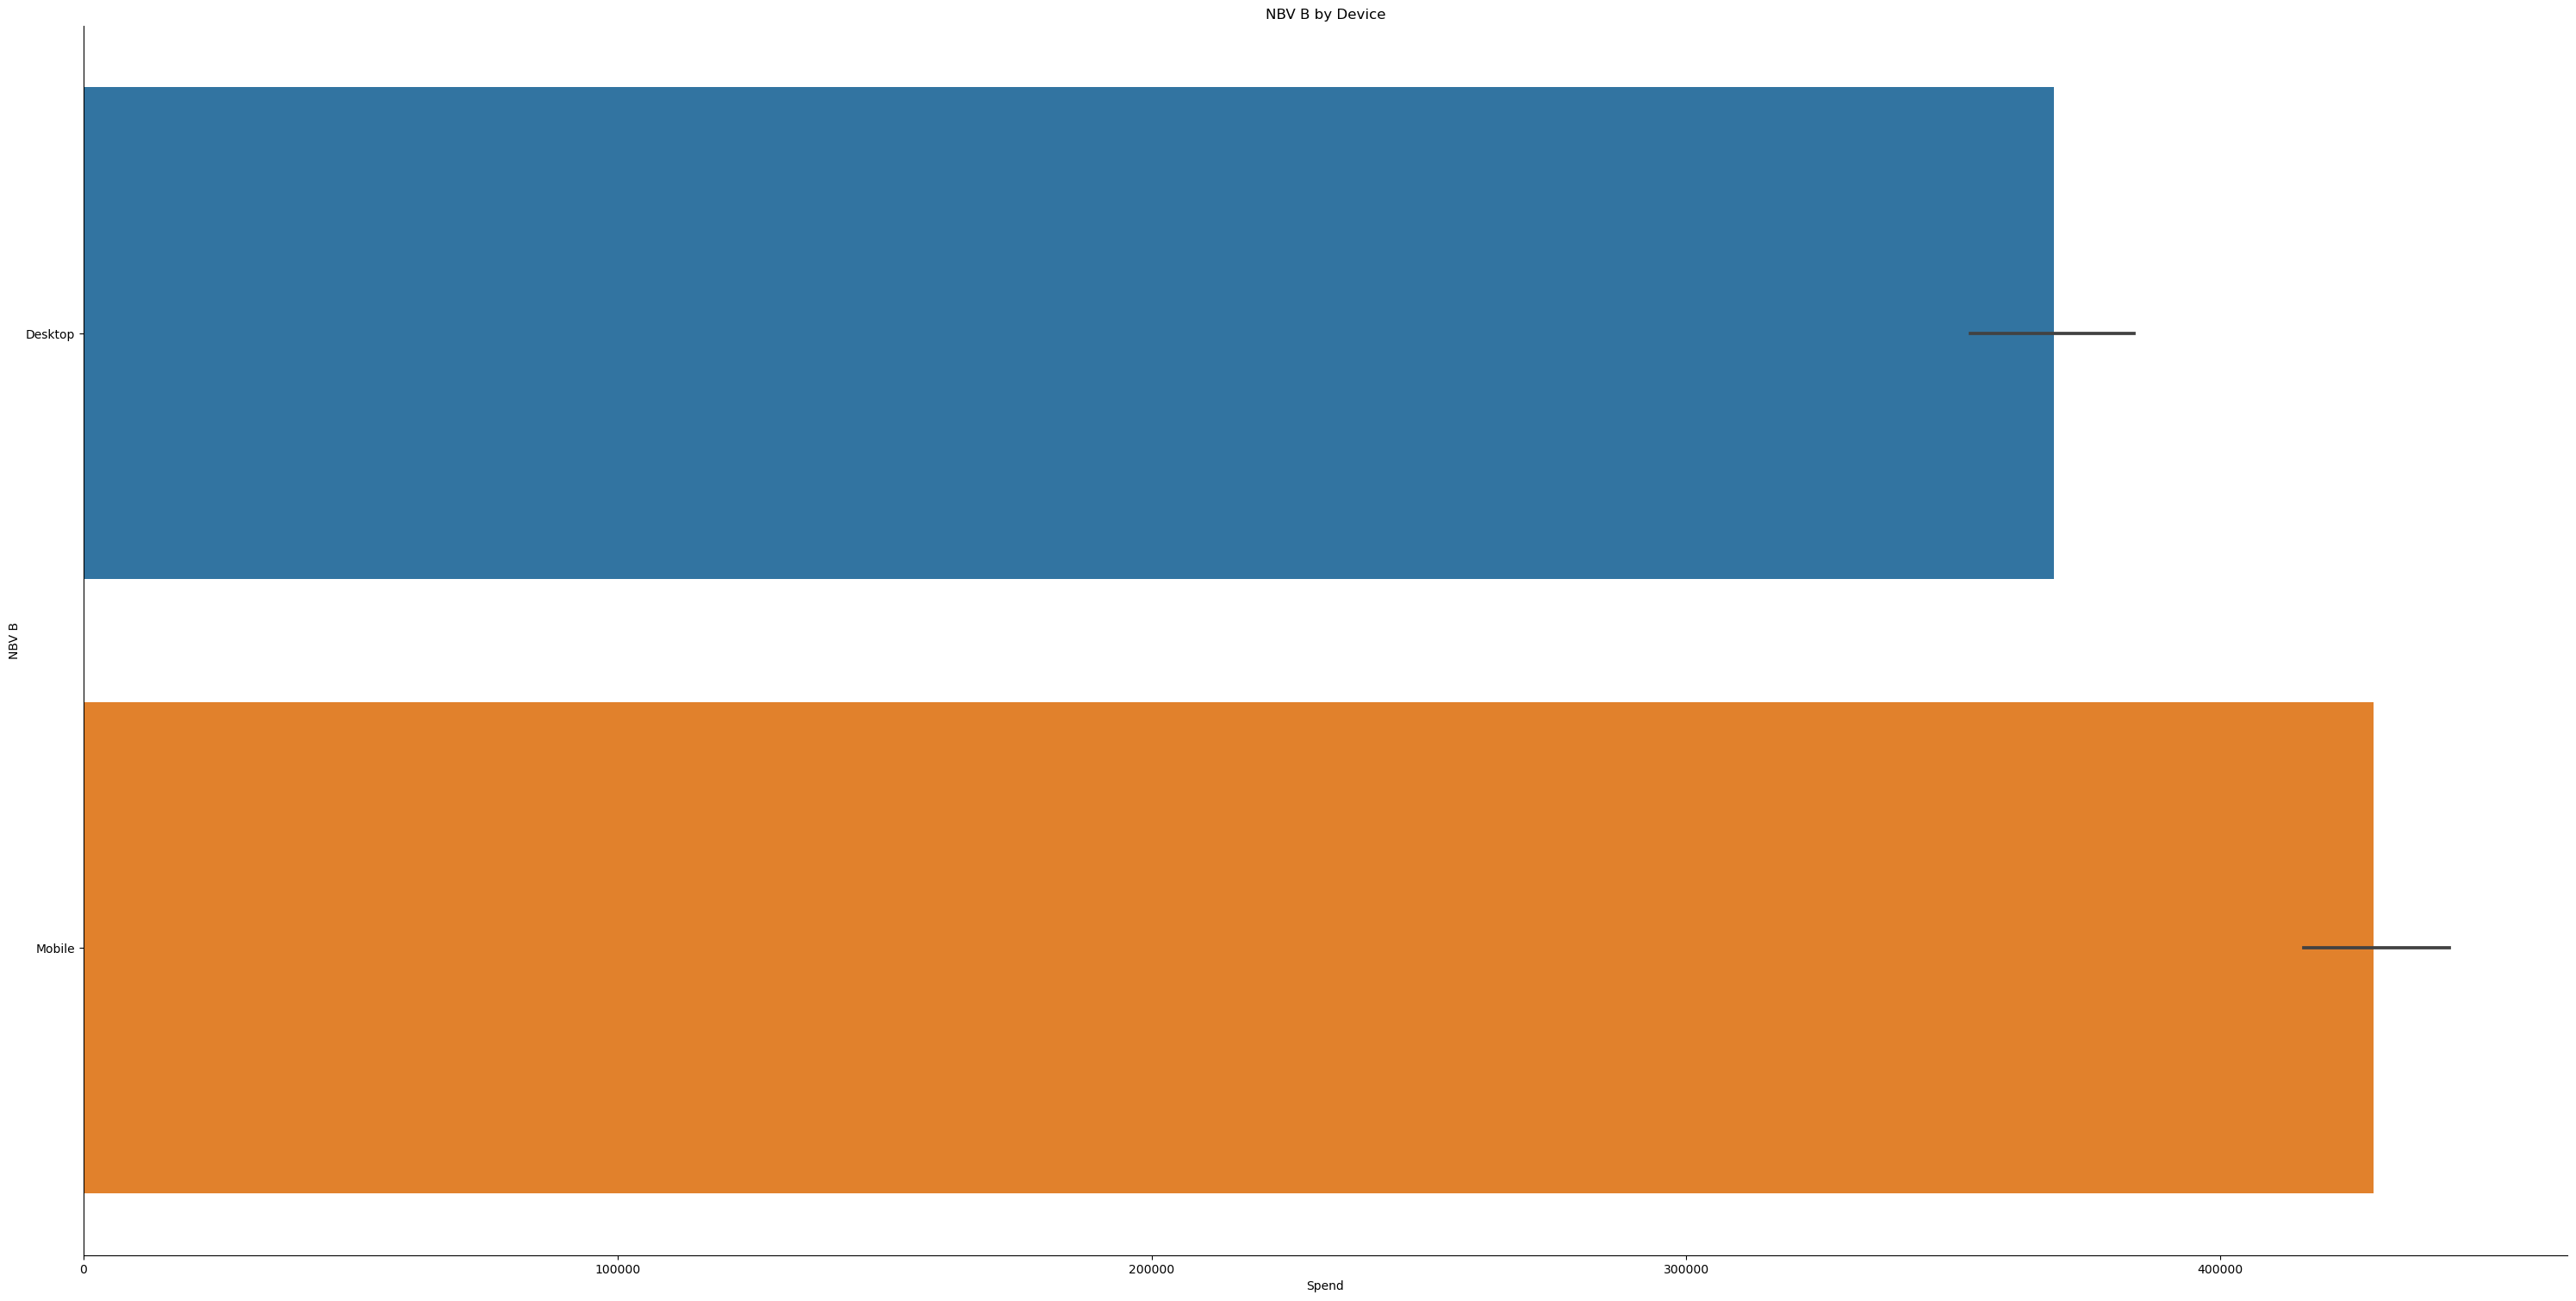

In [601]:
sns.catplot(data=df_1, x="NBV B", y="Device", kind="bar", height=15, aspect=2)
plt.xlabel("Spend")
plt.ylabel("NBV B")
plt.title("NBV B by Device")
plt.show()

### 2.3.7. StarRating - spend

In [602]:
df_1.groupby("StarRating")['spend'].describe().round()

,count,mean,std,min,25%,50%,75%,max
StarRating,,,,,,,,
High,736.0,10104.0,3524.0,3058.0,7799.0,10628.0,12801.0,16522.0
Low,736.0,10002.0,2588.0,5884.0,8130.0,9474.0,11666.0,16221.0
Mid,736.0,11366.0,2305.0,5359.0,10905.0,12040.0,12768.0,14505.0


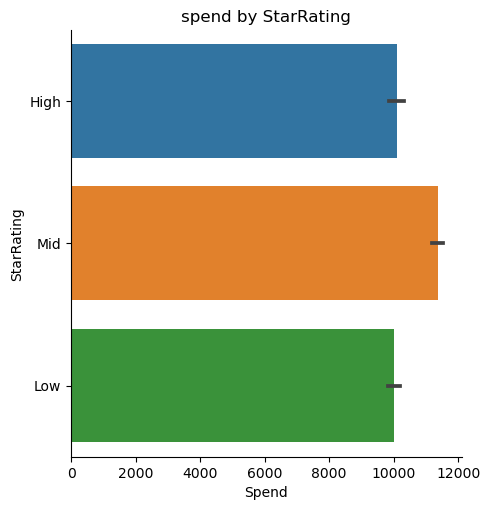

In [603]:
sns.catplot(data=df_1, x="spend", y="StarRating", kind="bar")
plt.xlabel("Spend")
plt.ylabel("StarRating")
plt.title("spend by StarRating")
plt.show()

### 2.3.8. StarRating - NBV A

In [604]:
df_1.groupby("StarRating")['NBV A'].describe().round()

,count,mean,std,min,25%,50%,75%,max
StarRating,,,,,,,,
High,736.0,163410.0,119413.0,19133.0,83890.0,131217.0,209978.0,385288.0
Low,736.0,145423.0,94303.0,37301.0,93964.0,103600.0,164466.0,327725.0
Mid,736.0,166738.0,98521.0,34517.0,108480.0,144761.0,191882.0,349686.0


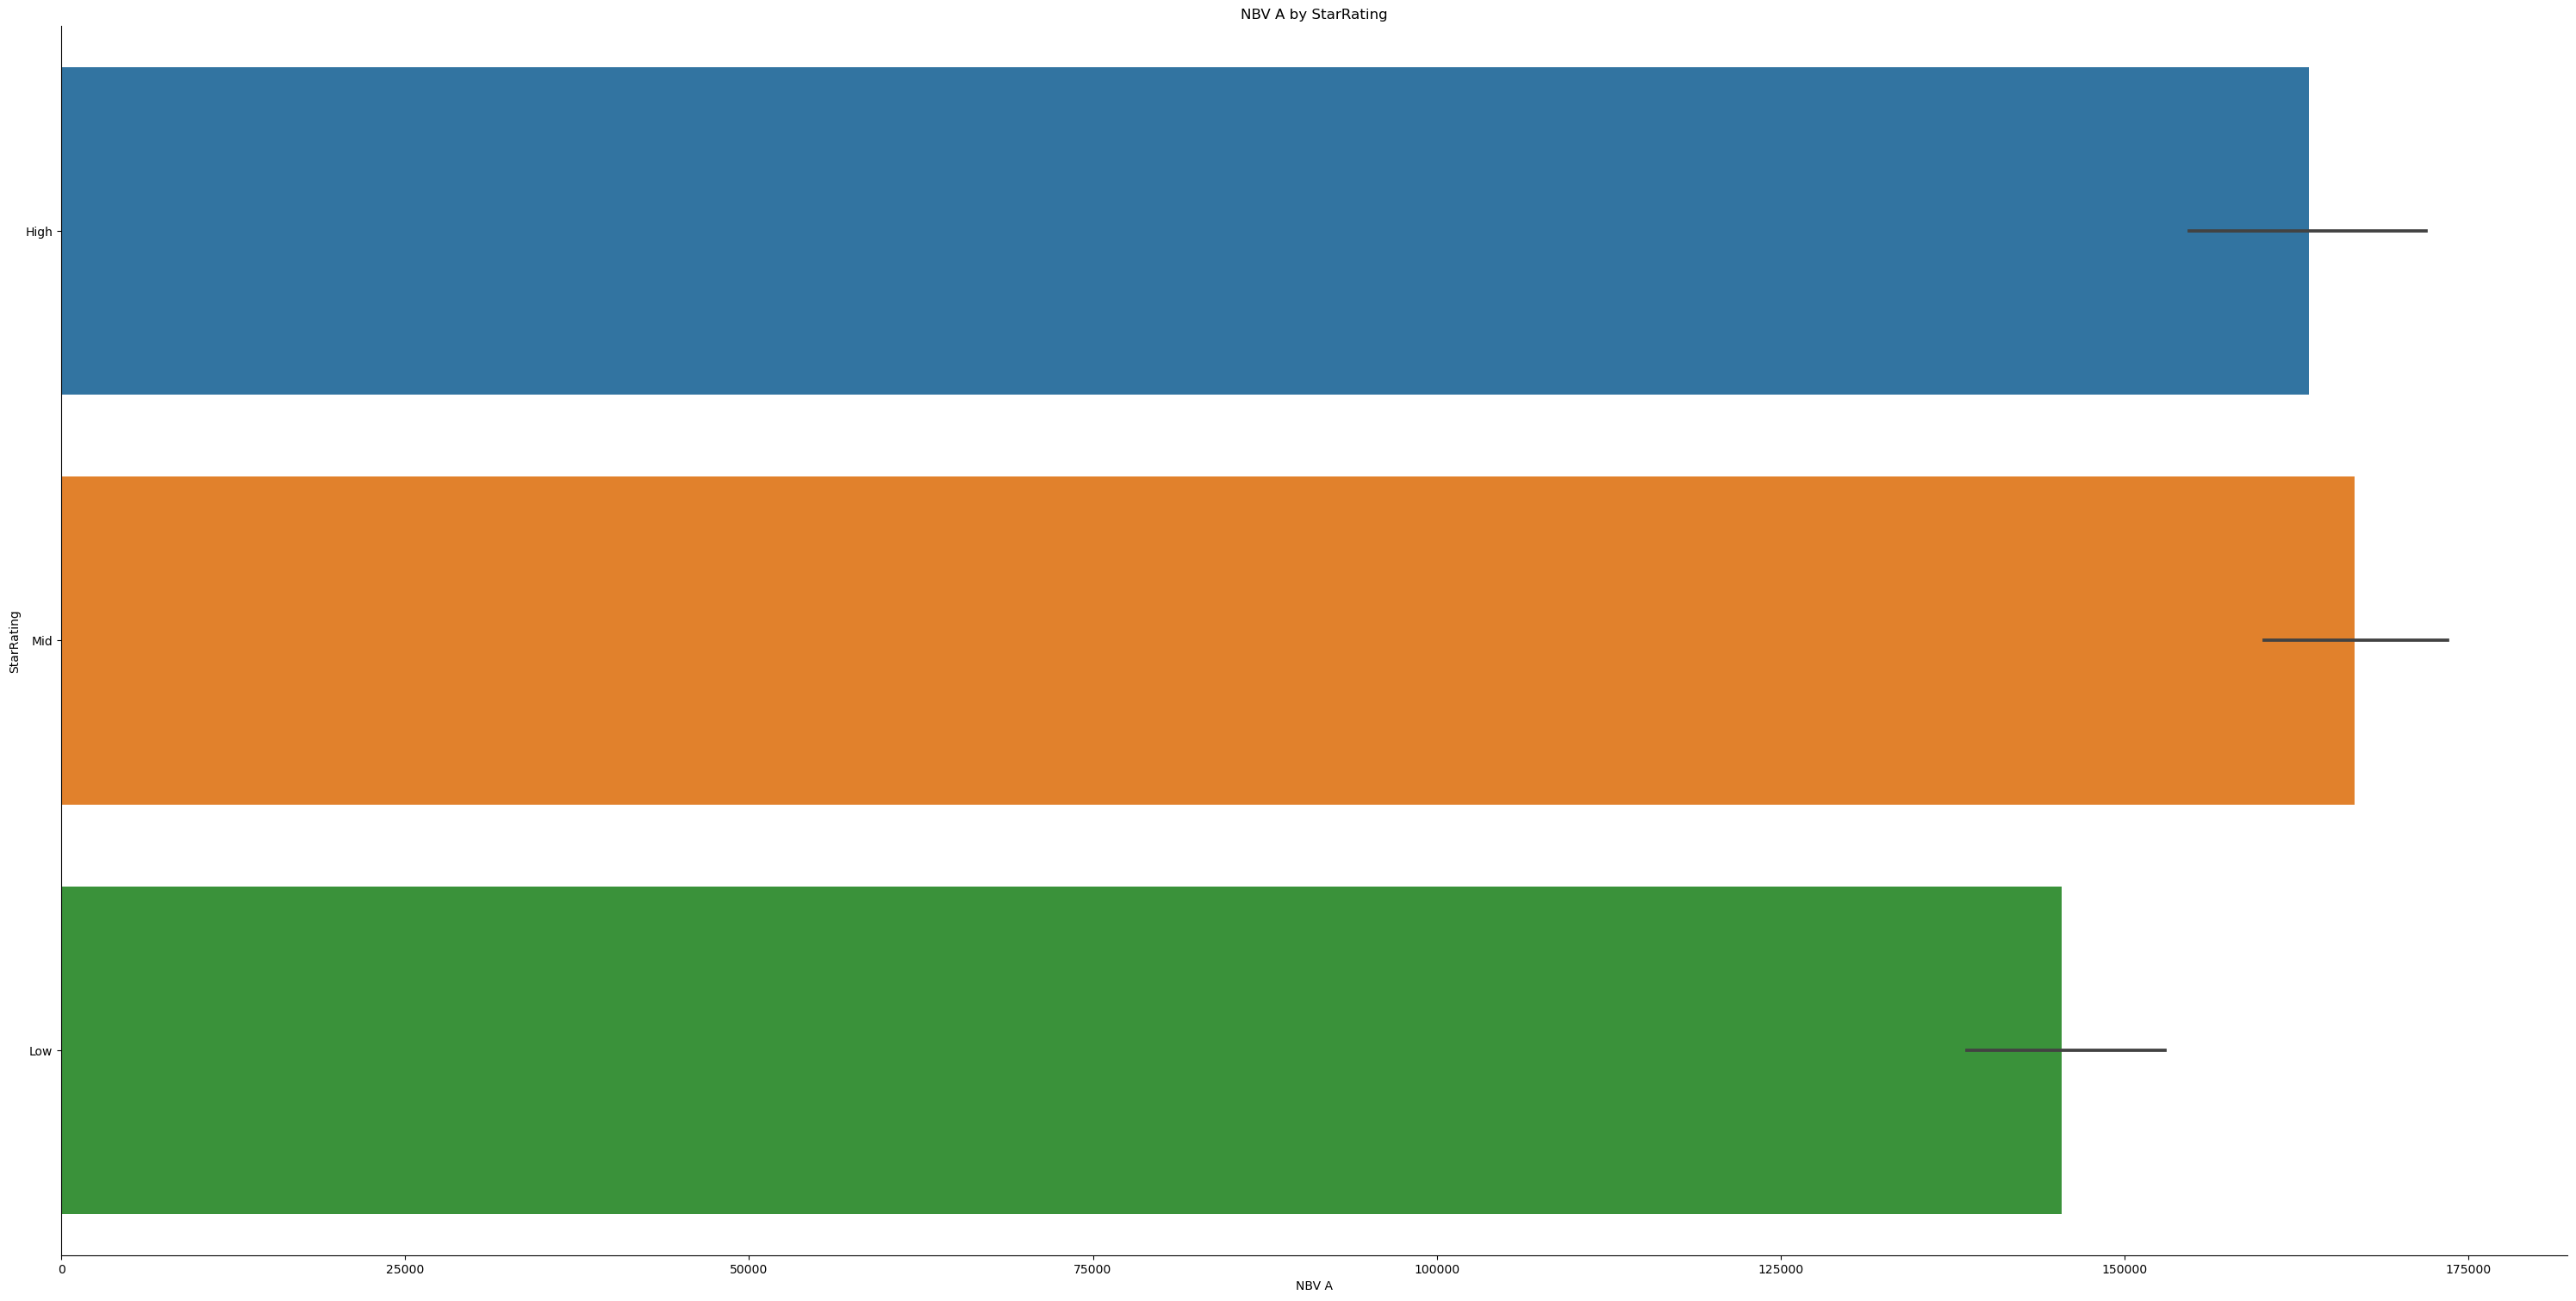

In [605]:
sns.catplot(data=df_1, x="NBV A", y="StarRating", kind="bar", height=15, aspect=2)
plt.xlabel("NBV A")
plt.ylabel("StarRating")
plt.title("NBV A by StarRating")
plt.show()

### 2.3.9. StarRating - NBV B

In [606]:
df_1.groupby("StarRating")['NBV B'].describe().round()

,count,mean,std,min,25%,50%,75%,max
StarRating,,,,,,,,
High,736.0,407046.0,283057.0,55518.0,223477.0,340486.0,519311.0,895423.0
Low,736.0,369217.0,221230.0,108772.0,258171.0,266825.0,415476.0,771582.0
Mid,736.0,419879.0,229774.0,100529.0,294013.0,372156.0,480203.0,821407.0


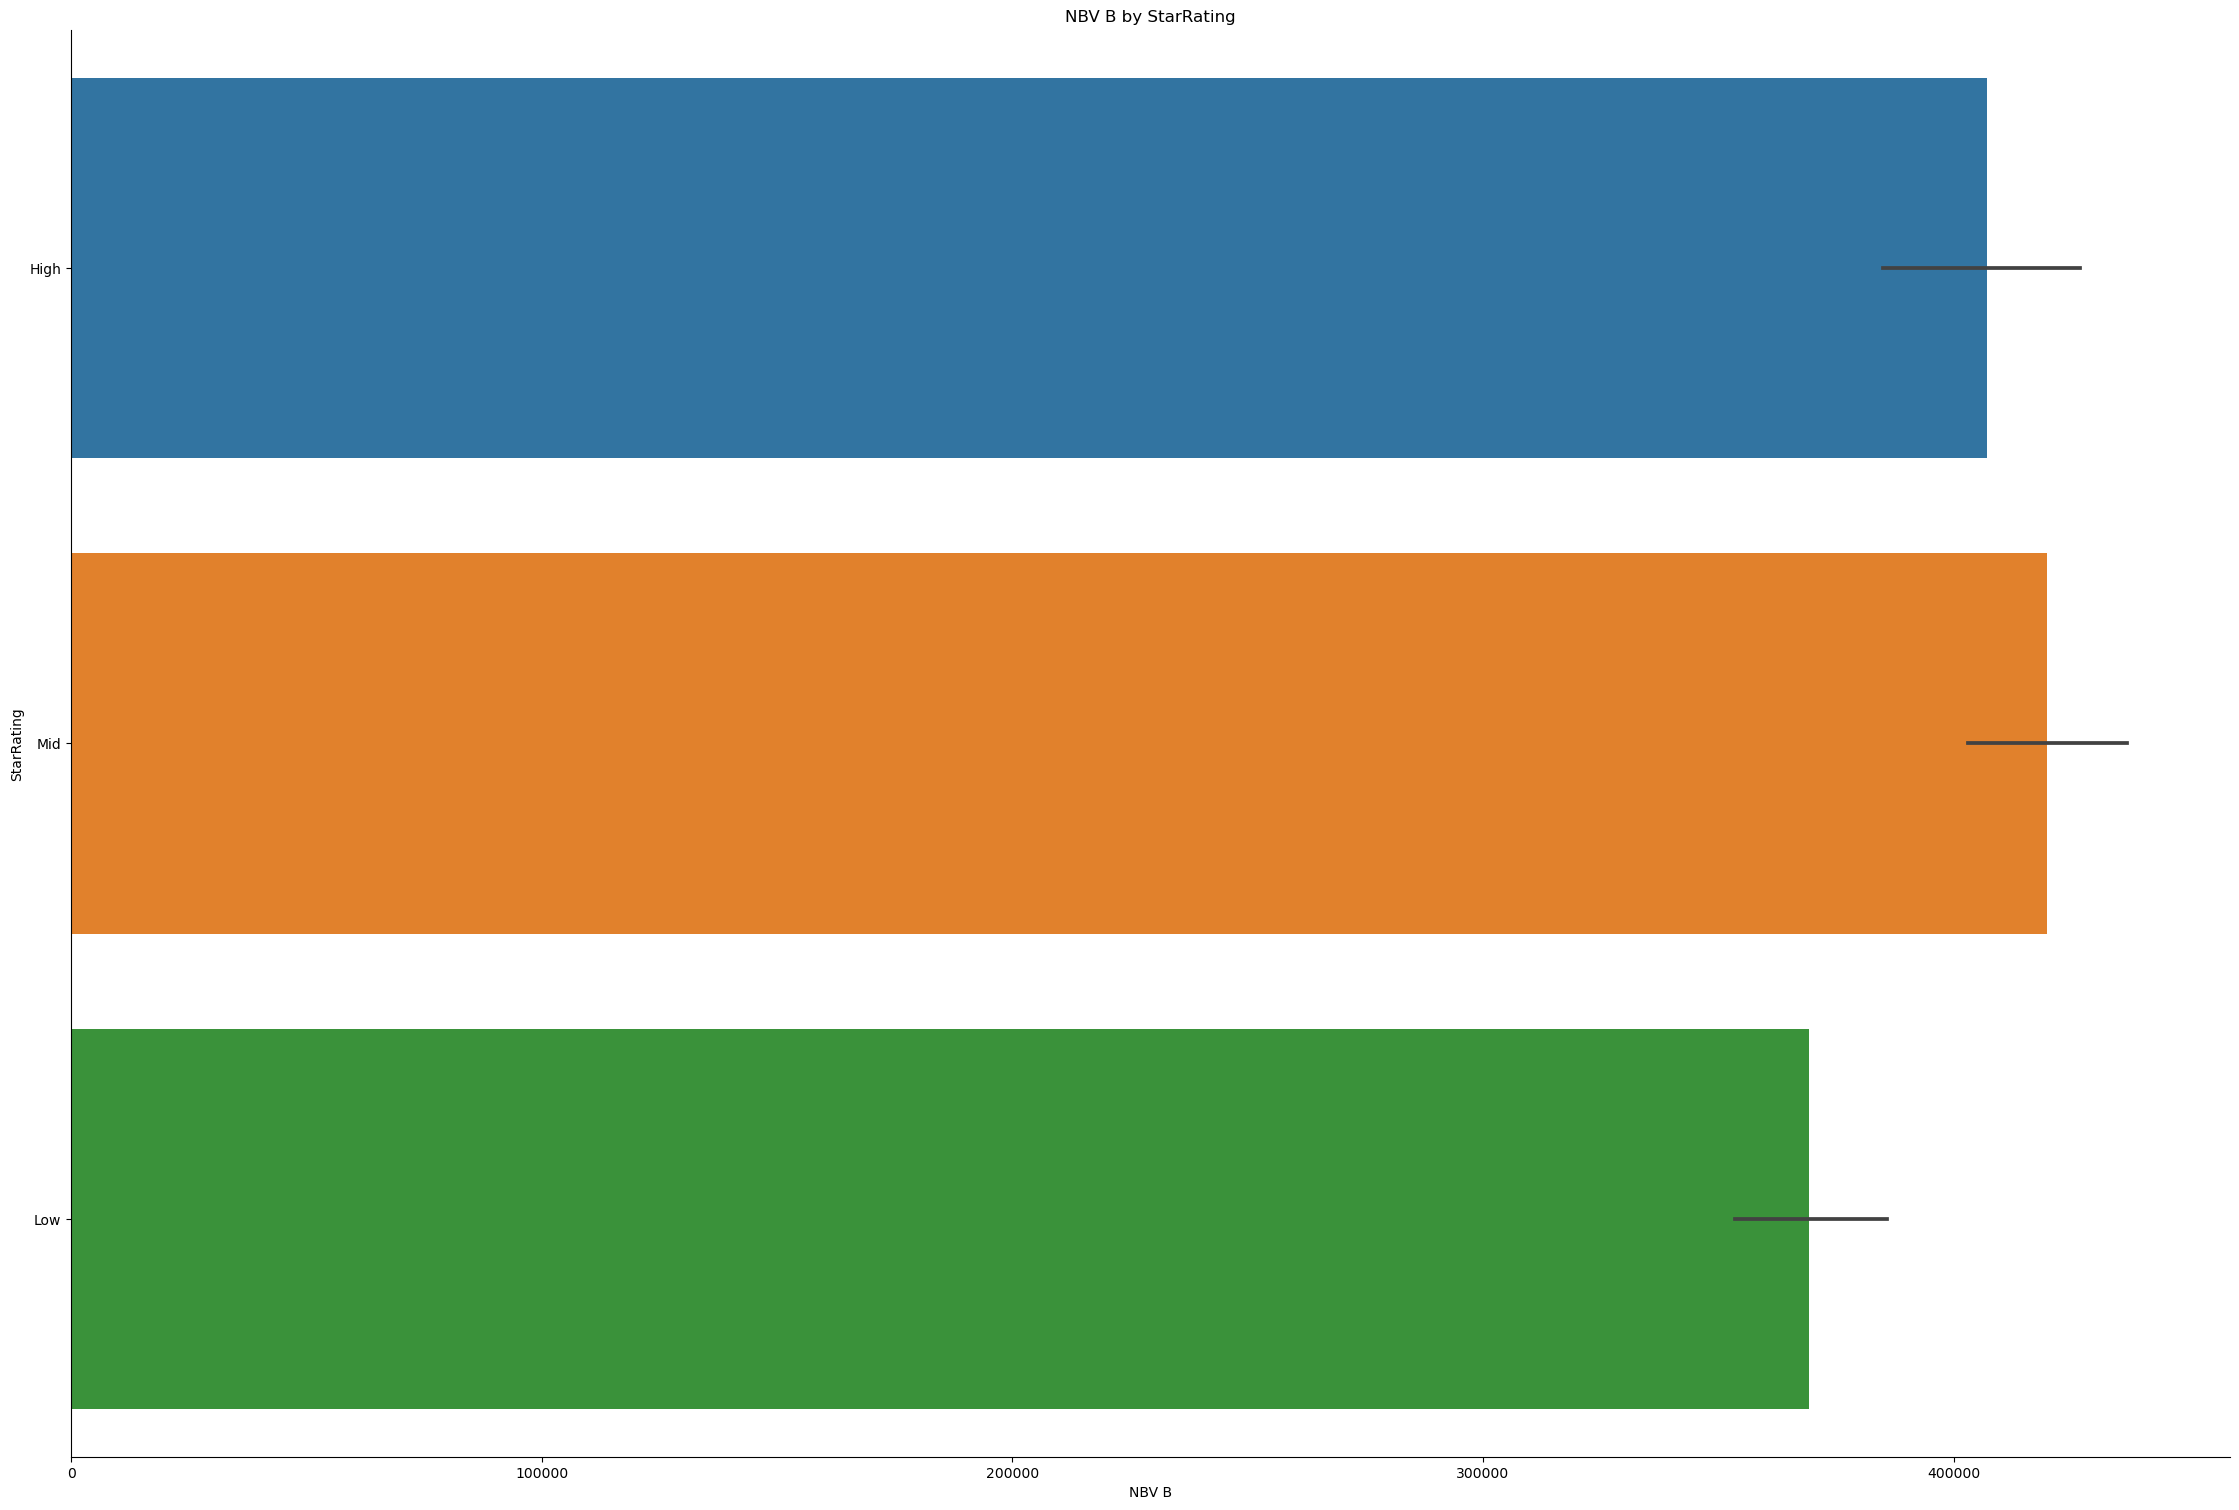

In [607]:
sns.catplot(data=df_1, x="NBV B", y="StarRating", kind="bar", height=15, aspect=1.5)
plt.xlabel("NBV B")
plt.ylabel("StarRating")
plt.title("NBV B by StarRating")
plt.show()

# 3. Analysis

## 3.1. IRP

Measures revenue gain from pricing strategy.

In [608]:
# Calculate Incrementality
df_1["IRP"] = df_1["NBV B"] - df_1["NBV A"] # IRP stands for Compute Incremental Revenue from Pricing

- This represents the additional revenue generated due to the discounting strategy.
- The values are high, especially for mobile bookings in APAC, suggesting strong discount-driven demand.

HotelSuperRegion  Device   StarRating
APAC              Desktop  High          Axes(0.125,0.11;0.775x0.77)
                           Low           Axes(0.125,0.11;0.775x0.77)
                           Mid           Axes(0.125,0.11;0.775x0.77)
                  Mobile   High          Axes(0.125,0.11;0.775x0.77)
                           Low           Axes(0.125,0.11;0.775x0.77)
                           Mid           Axes(0.125,0.11;0.775x0.77)
EMEA              Desktop  High          Axes(0.125,0.11;0.775x0.77)
                           Low           Axes(0.125,0.11;0.775x0.77)
                           Mid           Axes(0.125,0.11;0.775x0.77)
                  Mobile   High          Axes(0.125,0.11;0.775x0.77)
                           Low           Axes(0.125,0.11;0.775x0.77)
                           Mid           Axes(0.125,0.11;0.775x0.77)
LATAM             Desktop  High          Axes(0.125,0.11;0.775x0.77)
                           Low           Axes(0.125,0.11;0.775x0.

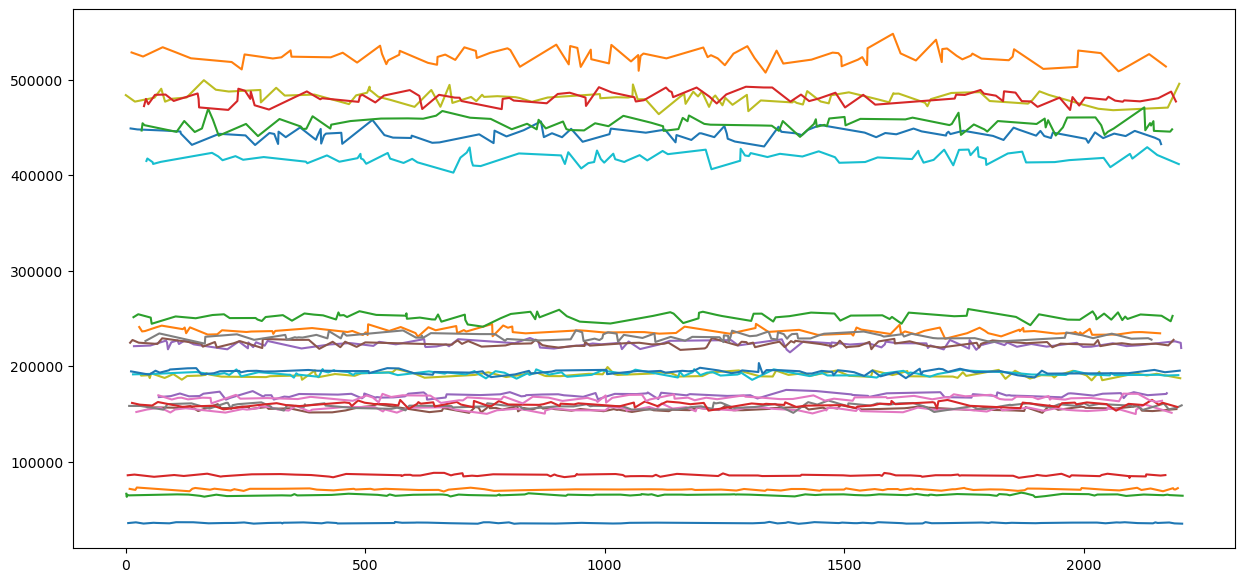

In [609]:
df_1.groupby(["HotelSuperRegion", "Device", "StarRating"])["IRP"].plot(kind="line", figsize=(15,7))

## 3.2. PSE

Measures how efficiently spend translates into incremental revenue.

In [610]:
# Compute Spend Efficiency (PSE)
df_1["PSE"] = df_1["IRP"] / df_1["spend"]

In [611]:
df_1

,date,HotelSuperRegion,Device,StarRating,spend,NBV A,NBV B,IRP,PSE
0,2024-10-12,NORAM,Desktop,High,12608.0,337183.0,820891.0,483708.0,38.365165
1,2024-10-18,APAC,Desktop,Mid,5513.0,34517.0,100962.0,66445.0,12.052422
2,2024-11-10,APAC,Desktop,Mid,6105.0,38275.0,101472.0,63197.0,10.351679
3,2024-12-20,APAC,Desktop,Mid,6154.0,36723.0,102143.0,65420.0,10.630484
4,2024-12-14,APAC,Mobile,High,7819.0,46389.0,132186.0,85797.0,10.972887
...,...,...,...,...,...,...,...,...,...
2203,2024-11-06,LATAM,Desktop,Mid,11127.0,140754.0,365152.0,224398.0,20.166981
2204,2024-11-25,LATAM,Desktop,Mid,11534.0,146429.0,365441.0,219012.0,18.988382
2205,2024-12-01,EMEA,Desktop,Low,8649.0,100486.0,259468.0,158982.0,18.381547
2206,2024-10-17,APAC,Desktop,High,3253.0,20791.0,55908.0,35117.0,10.795266


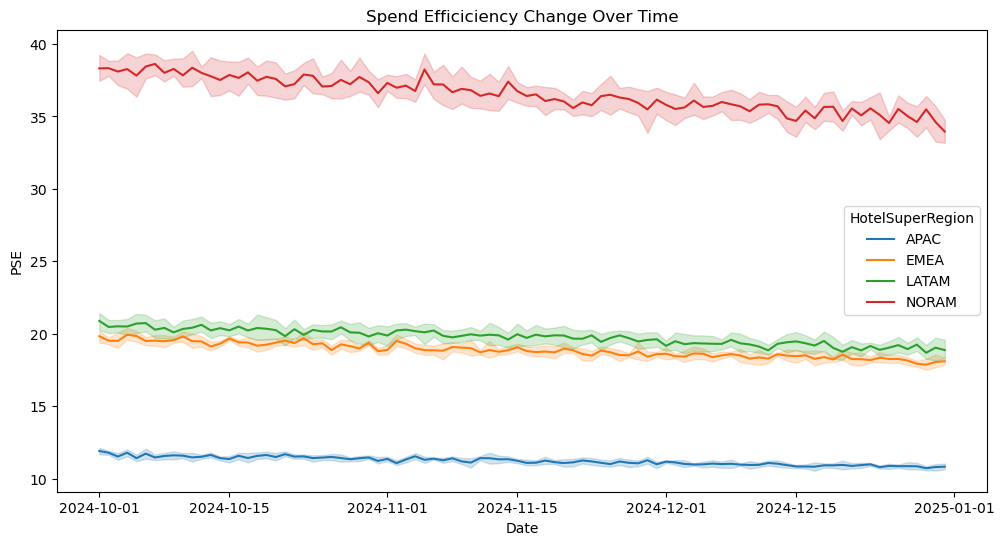

In [612]:
df_1 = df_1.sort_values(['HotelSuperRegion', 'Device', 'StarRating', 'date'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_1, x='date', y='PSE', hue='HotelSuperRegion')
plt.title("Spend Efficiciency Change Over Time")
plt.xlabel("Date")
plt.ylabel("PSE")
plt.show()

In [613]:
# Sort the DataFrame by the grouping columns and date
df_1 = df_1.sort_values(['HotelSuperRegion', 'Device', 'StarRating', 'date'])

# Compute the percentage change in spend within each group
df_1["Spend_pct_change"] = df_1.groupby(["HotelSuperRegion", "Device", "StarRating"])["spend"].pct_change()


# Compute % Change in Revenue
df_1["Revenue_pct_change"] = df_1.groupby(["HotelSuperRegion", "Device", "StarRating"])["IRP"].pct_change()

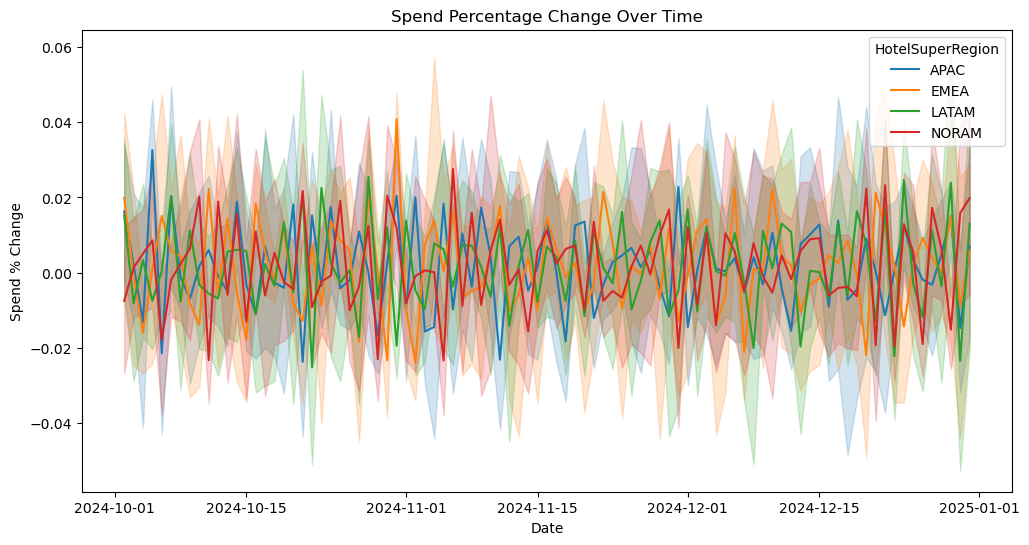

In [614]:
df_1 = df_1.sort_values(['HotelSuperRegion', 'Device', 'StarRating', 'date'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_1, x='date', y='Spend_pct_change', hue='HotelSuperRegion')
plt.title("Spend Percentage Change Over Time")
plt.xlabel("Date")
plt.ylabel("Spend % Change")
plt.show()

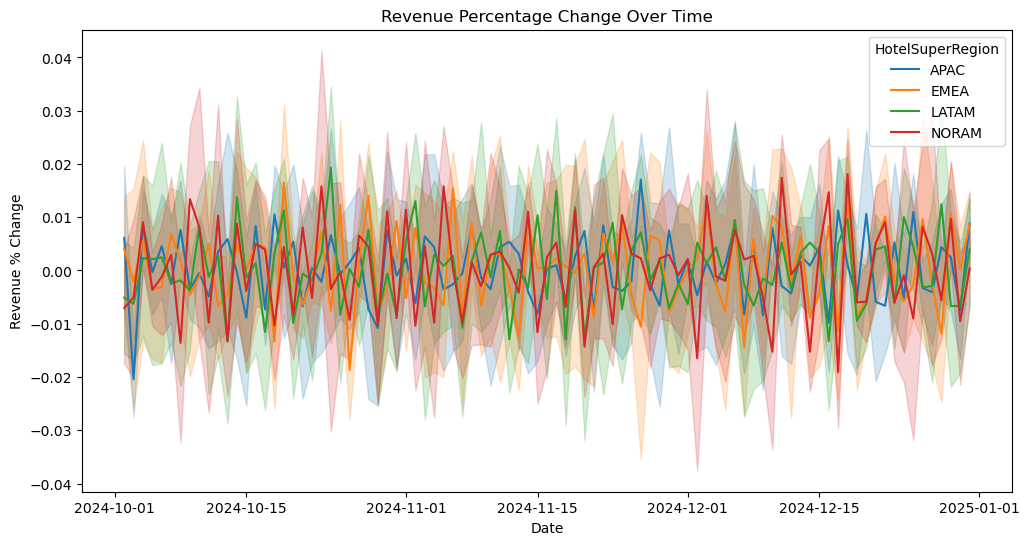

In [615]:
df_1 = df_1.sort_values(['HotelSuperRegion', 'Device', 'StarRating', 'date'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_1, x='date', y='Revenue_pct_change', hue='HotelSuperRegion')
plt.title("Revenue Percentage Change Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue % Change")
plt.show()

## 3.3. SED

Measures demand responsiveness to spend changes.

In [616]:
# Compute Spend Elasticity of Demand (SED)
# Recompute "SED" while handling division by zero safely
df_1["SED"] = df_1["Revenue_pct_change"].div(df_1["Spend_pct_change"]).replace([np.inf, -np.inf], np.nan)

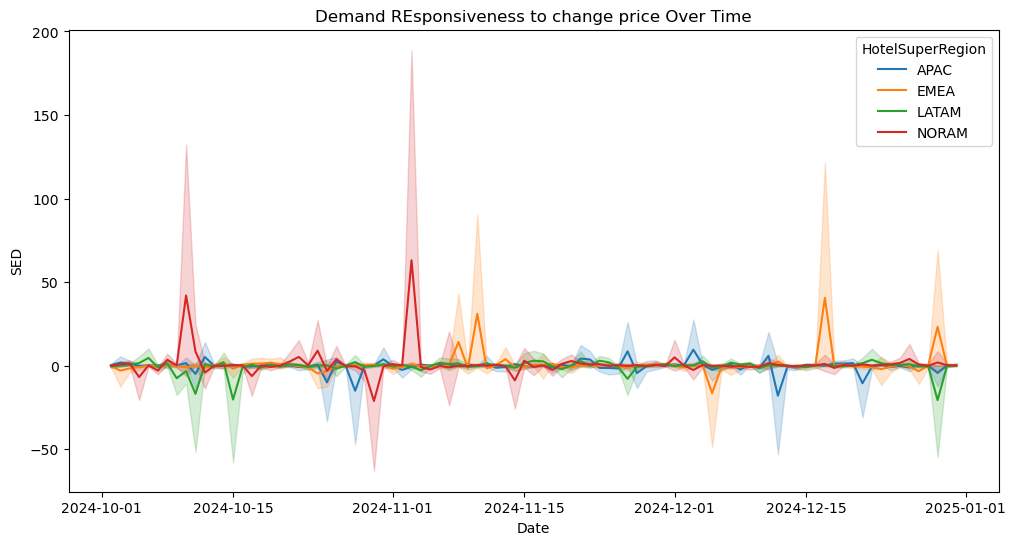

In [617]:
df_1 = df_1.sort_values(['HotelSuperRegion', 'Device', 'StarRating', 'date'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_1, x='date', y='SED', hue='HotelSuperRegion')
plt.title("Demand REsponsiveness to change price Over Time")
plt.xlabel("Date")
plt.ylabel("SED")
plt.show()

## 3.4. Aggregated Table

In [618]:
# Aggregate Data to Find Trends
agg_metrics = df_1.groupby(["HotelSuperRegion", "Device", "StarRating"]).agg({
    "spend": "sum",
    "NBV A": "sum",
    "NBV B": "sum",
    "IRP": "sum",
    "PSE": "mean",
    "SED": "mean"
}).reset_index()

In [619]:
agg_metrics

,HotelSuperRegion,Device,StarRating,spend,NBV A,NBV B,IRP,PSE,SED
0,APAC,Desktop,High,300625.0,1863251.0,5167762.0,3304511.0,11.001434,-2.158053
1,APAC,Desktop,Low,583874.0,3609244.0,10134360.0,6525116.0,11.186110,0.946426
2,APAC,Desktop,Mid,542456.0,3353694.0,9353540.0,5999846.0,11.072195,-0.802752
3,APAC,Mobile,High,694312.0,4235697.0,12122332.0,7886635.0,11.369538,0.868140
4,APAC,Mobile,Low,1370971.0,8177971.0,23778998.0,15601027.0,11.392251,0.153161
5,APAC,Mobile,Mid,1253886.0,7691660.0,22000250.0,14308590.0,11.420886,-0.622749
6,EMEA,Desktop,High,740867.0,9299779.0,23538110.0,14238331.0,19.240045,-0.179874
7,EMEA,Desktop,Low,773369.0,9159782.0,23717463.0,14557681.0,18.842214,2.717989
8,EMEA,Desktop,Mid,940224.0,11306799.0,28884590.0,17577791.0,18.713835,-1.461513
9,EMEA,Mobile,High,943572.0,11324258.0,29013068.0,17688810.0,18.767060,2.020496


In [620]:
agg_metrics.query("`SED` > 0").sort_values("SED", ascending=False)

,HotelSuperRegion,Device,StarRating,spend,NBV A,NBV B,IRP,PSE,SED
20,NORAM,Desktop,Mid,1111186.0,28764358.0,69448171.0,40683813.0,36.659310,5.366750
7,EMEA,Desktop,Low,773369.0,9159782.0,23717463.0,14557681.0,18.842214,2.717989
22,NORAM,Mobile,Low,1096388.0,29024545.0,70713895.0,41689350.0,38.073177,2.198561
10,EMEA,Mobile,Low,962241.0,11168806.0,29027385.0,17858579.0,18.578719,2.086682
9,EMEA,Mobile,High,943572.0,11324258.0,29013068.0,17688810.0,18.767060,2.020496
1,APAC,Desktop,Low,583874.0,3609244.0,10134360.0,6525116.0,11.186110,0.946426
3,APAC,Mobile,High,694312.0,4235697.0,12122332.0,7886635.0,11.369538,0.868140
21,NORAM,Mobile,High,1380464.0,33886425.0,82115314.0,48228889.0,34.984211,0.283566
4,APAC,Mobile,Low,1370971.0,8177971.0,23778998.0,15601027.0,11.392251,0.153161
14,LATAM,Desktop,Mid,1062478.0,13149140.0,33640657.0,20491517.0,19.304777,0.152279


# 4. Results

In [621]:
total_budget = 2000000

In [622]:
high_sed_budget = total_budget * 0.85
results_1 = agg_metrics.query("`SED` > 1").sort_values("SED", ascending=False)
results_1["Budget Allocation"] = (results_1["SED"] / results_1["SED"].sum()) * high_sed_budget
results_1.round(2)

,HotelSuperRegion,Device,StarRating,spend,NBV A,NBV B,IRP,PSE,SED,Budget Allocation
20,NORAM,Desktop,Mid,1111186.0,28764358.0,69448171.0,40683813.0,36.66,5.37,633993.83
7,EMEA,Desktop,Low,773369.0,9159782.0,23717463.0,14557681.0,18.84,2.72,321086.04
22,NORAM,Mobile,Low,1096388.0,29024545.0,70713895.0,41689350.0,38.07,2.20,259724.05
10,EMEA,Mobile,Low,962241.0,11168806.0,29027385.0,17858579.0,18.58,2.09,246507.44
9,EMEA,Mobile,High,943572.0,11324258.0,29013068.0,17688810.0,18.77,2.02,238688.65


In [623]:
results_2 = agg_metrics.query("`HotelSuperRegion` == 'APAC'").sort_values("SED", ascending=False).head(1)
results_2

,HotelSuperRegion,Device,StarRating,spend,NBV A,NBV B,IRP,PSE,SED
1,APAC,Desktop,Low,583874.0,3609244.0,10134360.0,6525116.0,11.18611,0.946426


In [624]:
results_3 = agg_metrics.query("`HotelSuperRegion` == 'LATAM'").sort_values("SED", ascending=False).head(1)
results_3

,HotelSuperRegion,Device,StarRating,spend,NBV A,NBV B,IRP,PSE,SED
14,LATAM,Desktop,Mid,1062478.0,13149140.0,33640657.0,20491517.0,19.304777,0.152279


In [625]:
results_4 = pd.concat([results_2, results_3], ignore_index=True)
results_4


,HotelSuperRegion,Device,StarRating,spend,NBV A,NBV B,IRP,PSE,SED
0,APAC,Desktop,Low,583874.0,3609244.0,10134360.0,6525116.0,11.186110,0.946426
1,LATAM,Desktop,Mid,1062478.0,13149140.0,33640657.0,20491517.0,19.304777,0.152279


In [626]:
low_sed_budget = total_budget * 0.15

In [627]:
results_4["Budget Allocation"] = (results_4["SED"] / results_4["SED"].sum()) * high_sed_budget

In [628]:
results = pd.concat([results_1, results_4], ignore_index=True)

In [630]:
results.round(2)

,HotelSuperRegion,Device,StarRating,spend,NBV A,NBV B,IRP,PSE,SED,Budget Allocation
0,NORAM,Desktop,Mid,1111186.0,28764358.0,69448171.0,40683813.0,36.66,5.37,633993.83
1,EMEA,Desktop,Low,773369.0,9159782.0,23717463.0,14557681.0,18.84,2.72,321086.04
2,NORAM,Mobile,Low,1096388.0,29024545.0,70713895.0,41689350.0,38.07,2.20,259724.05
3,EMEA,Mobile,Low,962241.0,11168806.0,29027385.0,17858579.0,18.58,2.09,246507.44
4,EMEA,Mobile,High,943572.0,11324258.0,29013068.0,17688810.0,18.77,2.02,238688.65
5,APAC,Desktop,Low,583874.0,3609244.0,10134360.0,6525116.0,11.19,0.95,1464382.87
6,LATAM,Desktop,Mid,1062478.0,13149140.0,33640657.0,20491517.0,19.30,0.15,235617.13


## 5. Clustering

In [464]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [468]:
# Selecting relevant features for clustering
features = ["spend", "NBV A", "NBV B", "IRP", "PSE", "SED"]
df_cluster = df_1[features].copy()

In [469]:
# Select only numerical columns 
numerical_cols = df_1.select_dtypes(include=[np.number]).columns
df_final_imputed = df_1[numerical_cols].copy()

In [470]:
# Impute missing values with the mean of each column
df_final_imputed.fillna(df_final_imputed.mean(), inplace=True)

In [471]:
scaler = StandardScaler()
# Standardizing the numerical data
df_cluster_scaled = scaler.fit_transform(df_final_imputed[features])

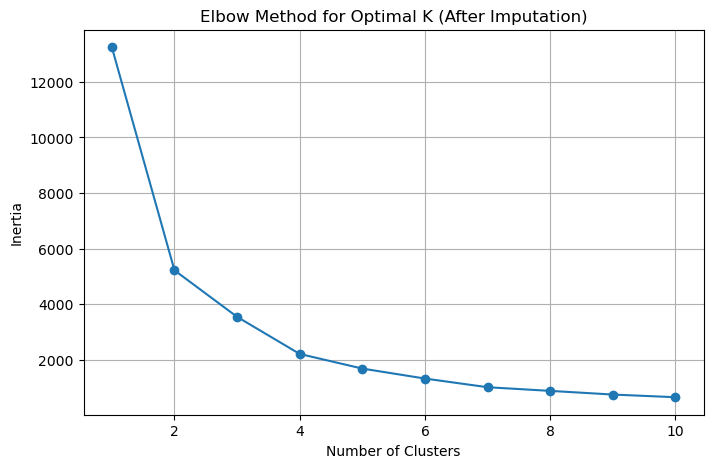

In [472]:
# Determine optimal number of clusters using the elbow method after imputation
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cluster_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method to find optimal K
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K (After Imputation)")
plt.grid(True)
plt.show()

In [473]:

# Applying K-Means with optimal clusters (adjust based on elbow plot)
optimal_k = 4  # Adjusting based on elbow plot analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_final_imputed["Cluster"] = kmeans.fit_predict(df_cluster_scaled)

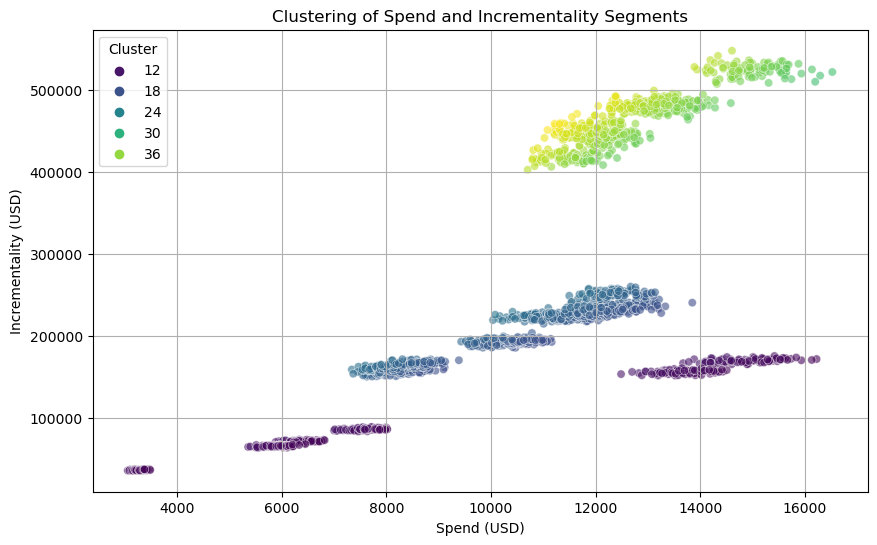

In [474]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_final_imputed["spend"], y=df_final_imputed["IRP"], hue=df_final_imputed["PSE"], palette="viridis", alpha=0.6)
plt.xlabel("Spend (USD)")
plt.ylabel("Incrementality (USD)")
plt.title("Clustering of Spend and Incrementality Segments")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [475]:
# Analyzing cluster characteristics
cluster_summary = df_final_imputed.groupby("Cluster").agg(
    avg_spend=("spend", "mean"),
    avg_incrementality=("IRP", "mean"),
    avg_efficiency=("PSE", "mean"),
    count=("spend", "count")
).reset_index()


In [476]:
cluster_summary.round(2)

,Cluster,avg_spend,avg_incrementality,avg_efficiency,count
0,0,10851.14,193414.61,18.20,1285
1,1,12808.50,466589.77,36.54,550
2,2,5764.31,64445.95,11.16,368
3,3,10728.20,292324.20,26.43,5


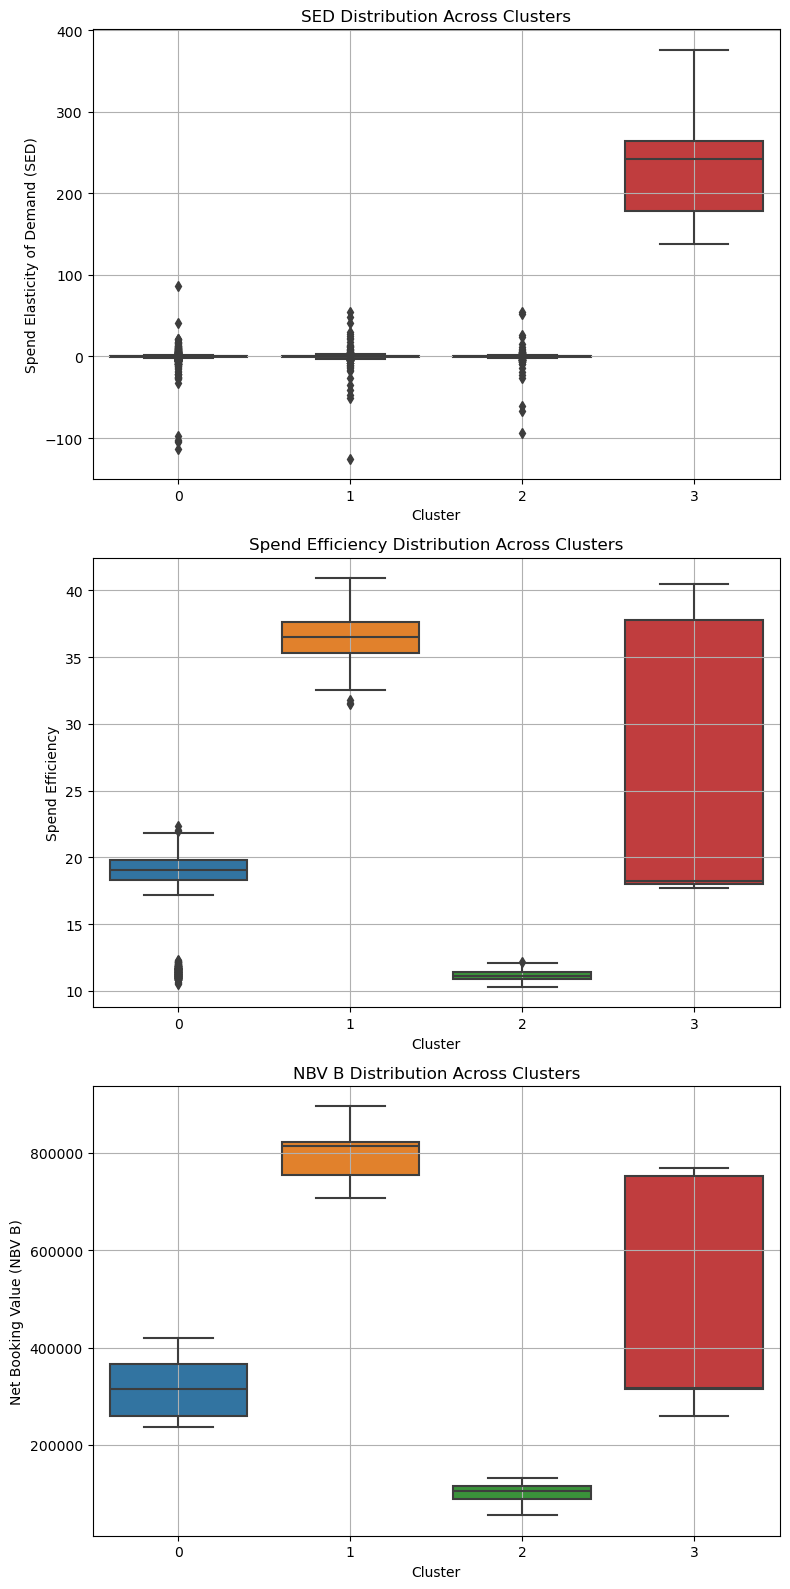

In [640]:
fig, axes = plt.subplots(3, 1, figsize=(8, 16))

# Box plot for Spend Elasticity of Demand (SED)
sns.boxplot(x=df_final_imputed["Cluster"], y=df_final_imputed["SED"], ax=axes[0])
axes[0].set_xlabel("Cluster")
axes[0].set_ylabel("Spend Elasticity of Demand (SED)")
axes[0].set_title("SED Distribution Across Clusters")
axes[0].grid(True)

# Compute Spend Efficiency
df_final_imputed["Spend Efficiency"] = (df_final_imputed["NBV B"] - df_final_imputed["NBV A"]) / df_final_imputed["spend"]

# Box plot for Spend Efficiency
sns.boxplot(x=df_final_imputed["Cluster"], y=df_final_imputed["Spend Efficiency"], ax=axes[1])
axes[1].set_xlabel("Cluster")
axes[1].set_ylabel("Spend Efficiency")
axes[1].set_title("Spend Efficiency Distribution Across Clusters")
axes[1].grid(True)

# Box plot for Net Booking Value (NBV B)
sns.boxplot(x=df_final_imputed["Cluster"], y=df_final_imputed["NBV B"], ax=axes[2])
axes[2].set_xlabel("Cluster")
axes[2].set_ylabel("Net Booking Value (NBV B)")
axes[2].set_title("NBV B Distribution Across Clusters")
axes[2].grid(True)

# Display the combined figure with three subplots
plt.tight_layout()
plt.show()


In [634]:
# Ensure we are using the original dataset to retrieve categorical columns
if "Cluster" in df_final_imputed.columns:
    df_1["Cluster"] = df_final_imputed["Cluster"]  # Ensure the mapping is retained

# Select relevant columns and remove duplicates
cluster_mapping = df_1[["HotelSuperRegion", "Device", "StarRating", "Cluster"]].drop_duplicates()


In [636]:
cluster_mapping.sort_values("Cluster")

,HotelSuperRegion,Device,StarRating,Cluster
1519,EMEA,Mobile,Mid,0
183,LATAM,Desktop,Low,0
444,LATAM,Desktop,High,0
1719,LATAM,Mobile,Low,0
1317,LATAM,Mobile,Mid,0
1542,EMEA,Mobile,Low,0
1892,EMEA,Mobile,High,0
1415,LATAM,Desktop,Mid,0
25,EMEA,Desktop,Mid,0
2103,EMEA,Desktop,Low,0


# 6. Business-Conscious Optimized Budget Allocation

To make the allocation both mathematically and business-justified, we will apply the following business constraints:

- Diversification: We must allocate at least 15% to underperforming regions to maintain market presence.
- Risk Management: We should not allocate more than 50% of the budget to a single region to prevent over-reliance.
- Strategic Growth Considerations: We consider emerging markets (e.g., APAC) where brand presence can grow.
- Device Strategy: Since Mobile is outperforming Desktop, we prioritize Mobile without eliminating Desktop completely.
- Balanced Hotel Star Rating Approach: While Mid-tier is the best, we keep some investment in Low and High categories.